In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.multioutput import RegressorChain
from sklearn.preprocessing import LabelEncoder
import seaborn as sns


In [35]:
trfile=pd.read_csv(r"K:\SMU August 2025\CS611-G1-Machine Learning Engineering\Group Project -5\data\train.csv")
trfile.head()

id        date  store_nbr      family  sales  onpromotion
0   0  2013-01-01          1  AUTOMOTIVE    0.0            0
1   1  2013-01-01          1   BABY CARE    0.0            0
2   2  2013-01-01          1      BEAUTY    0.0            0
3   3  2013-01-01          1   BEVERAGES    0.0            0
4   4  2013-01-01          1       BOOKS    0.0            0

In [36]:
trfile.describe()

id     store_nbr         sales   onpromotion
count  3.000888e+06  3.000888e+06  3.000888e+06  3.000888e+06
mean   1.500444e+06  2.750000e+01  3.577757e+02  2.602770e+00
std    8.662819e+05  1.558579e+01  1.101998e+03  1.221888e+01
min    0.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00
25%    7.502218e+05  1.400000e+01  0.000000e+00  0.000000e+00
50%    1.500444e+06  2.750000e+01  1.100000e+01  0.000000e+00
75%    2.250665e+06  4.100000e+01  1.958473e+02  0.000000e+00
max    3.000887e+06  5.400000e+01  1.247170e+05  7.410000e+02

In [55]:
call = trfile[trfile['sales']>0]
call

id       date  store_nbr                      family     sales  \
563          563 2013-01-01         25                      BEAUTY     2.000   
564          564 2013-01-01         25                   BEVERAGES   810.000   
566          566 2013-01-01         25                BREAD/BAKERY   180.589   
568          568 2013-01-01         25                    CLEANING   186.000   
569          569 2013-01-01         25                       DAIRY   143.000   
...          ...        ...        ...                         ...       ...   
3000883  3000883 2017-08-15          9                     POULTRY   438.133   
3000884  3000884 2017-08-15          9              PREPARED FOODS   154.553   
3000885  3000885 2017-08-15          9                     PRODUCE  2419.729   
3000886  3000886 2017-08-15          9  SCHOOL AND OFFICE SUPPLIES   121.000   
3000887  3000887 2017-08-15          9                     SEAFOOD    16.000   

         onpromotion  
563                0  
564                0  
566                0  
568                0  
569                0  
...              ...  
3000883            0  
3000884            1  
3000885          148  
3000886            8  
3000887            0  

[2061758 rows x 6 columns]

In [38]:
trfile['family'].unique().tolist()


['AUTOMOTIVE',
 'BABY CARE',
 'BEAUTY',
 'BEVERAGES',
 'BOOKS',
 'BREAD/BAKERY',
 'CELEBRATION',
 'CLEANING',
 'DAIRY',
 'DELI',
 'EGGS',
 'FROZEN FOODS',
 'GROCERY I',
 'GROCERY II',
 'HARDWARE',
 'HOME AND KITCHEN I',
 'HOME AND KITCHEN II',
 'HOME APPLIANCES',
 'HOME CARE',
 'LADIESWEAR',
 'LAWN AND GARDEN',
 'LINGERIE',
 'LIQUOR,WINE,BEER',
 'MAGAZINES',
 'MEATS',
 'PERSONAL CARE',
 'PET SUPPLIES',
 'PLAYERS AND ELECTRONICS',
 'POULTRY',
 'PREPARED FOODS',
 'PRODUCE',
 'SCHOOL AND OFFICE SUPPLIES',
 'SEAFOOD']

In [39]:
# Count how many times each unique value appears in 'family' column
family_counts = trfile['family'].value_counts().reset_index()

# Rename the columns for clarity
family_counts.columns = ['family', 'count']

# Display the resulting DataFrame
print(family_counts)

# If you want to save the result to a new CSV file:
#family_counts.to_csv('family_counts.csv', index=False)

                        family  count
0                   AUTOMOTIVE  90936
1                    BABY CARE  90936
2                       BEAUTY  90936
3                    BEVERAGES  90936
4                        BOOKS  90936
5                 BREAD/BAKERY  90936
6                  CELEBRATION  90936
7                     CLEANING  90936
8                        DAIRY  90936
9                         DELI  90936
10                        EGGS  90936
11                FROZEN FOODS  90936
12                   GROCERY I  90936
13                  GROCERY II  90936
14                    HARDWARE  90936
15          HOME AND KITCHEN I  90936
16         HOME AND KITCHEN II  90936
17             HOME APPLIANCES  90936
18                   HOME CARE  90936
19                  LADIESWEAR  90936
20             LAWN AND GARDEN  90936
21                    LINGERIE  90936
22            LIQUOR,WINE,BEER  90936
23                   MAGAZINES  90936
24                       MEATS  90936
25          

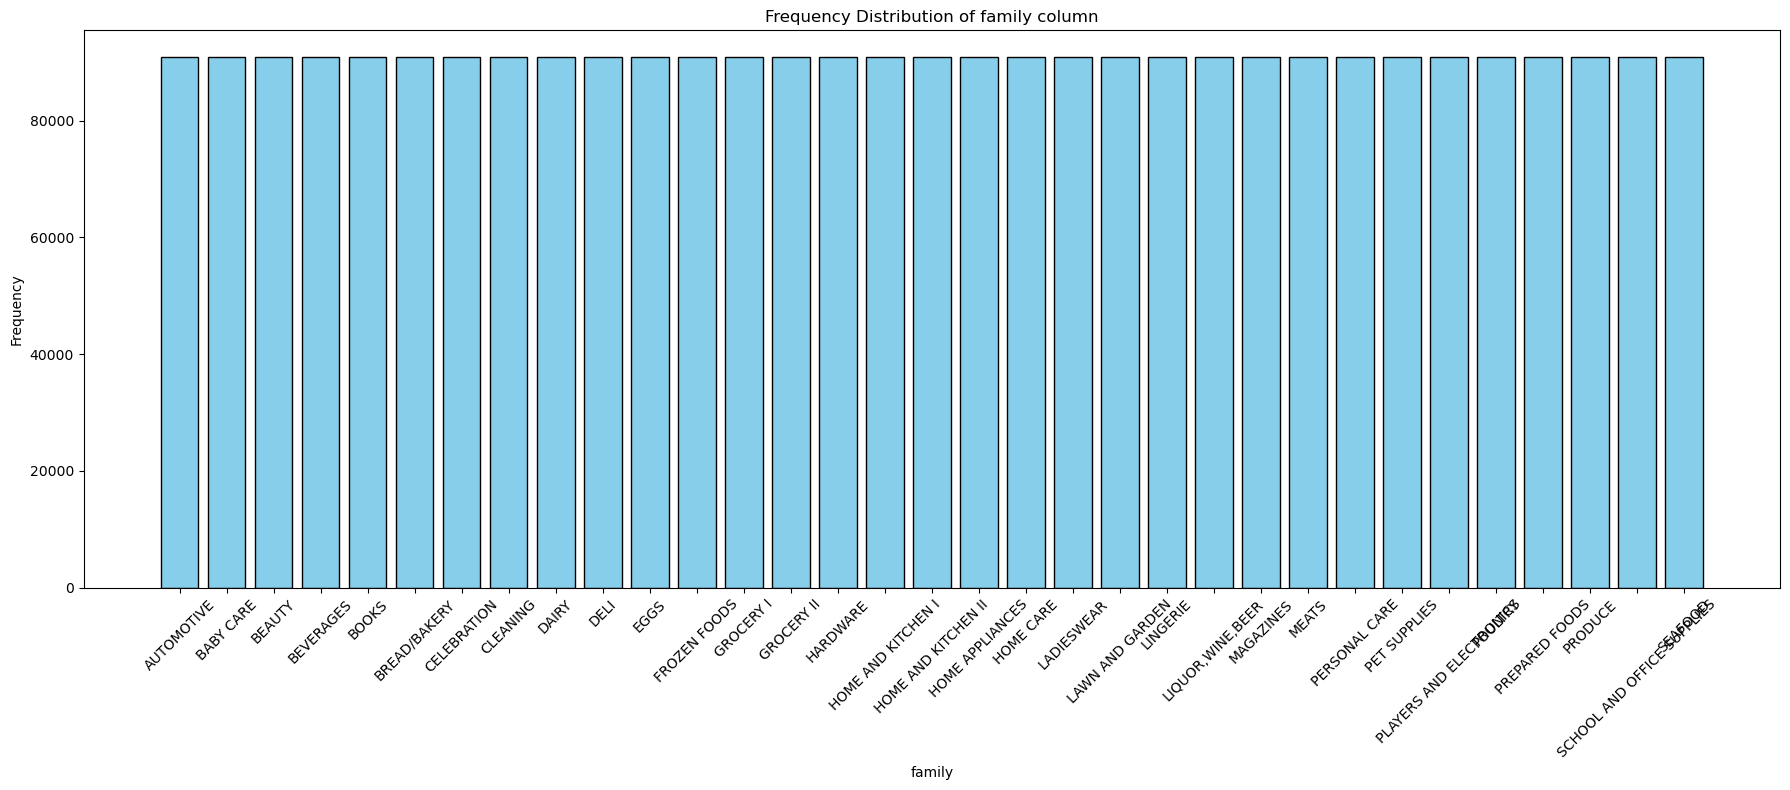

In [40]:
#categorical variable
# For categorical columns only
col_to_plot = ['family']

for col in col_to_plot:
    # Count the occurrences of each category
    counts = trfile[col].value_counts()

    plt.figure(figsize=(18, 8))
    plt.bar(counts.index, counts.values, color='skyblue', edgecolor='black')
    plt.title(f'Frequency Distribution of {col} column')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.tight_layout()  # adjust layout so labels fit nicely
    plt.show()

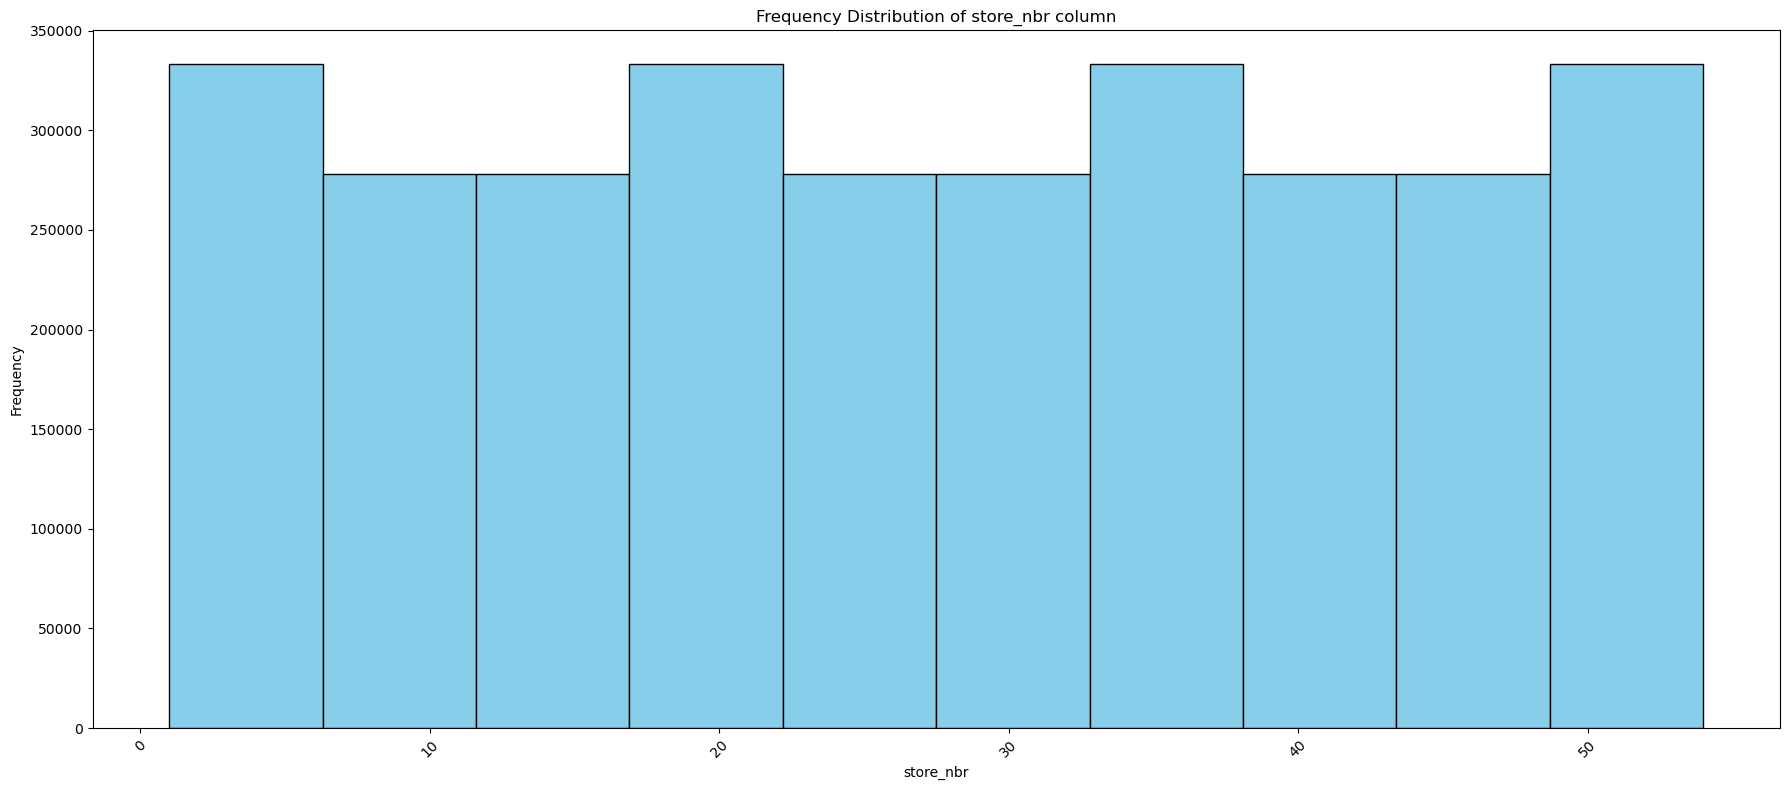

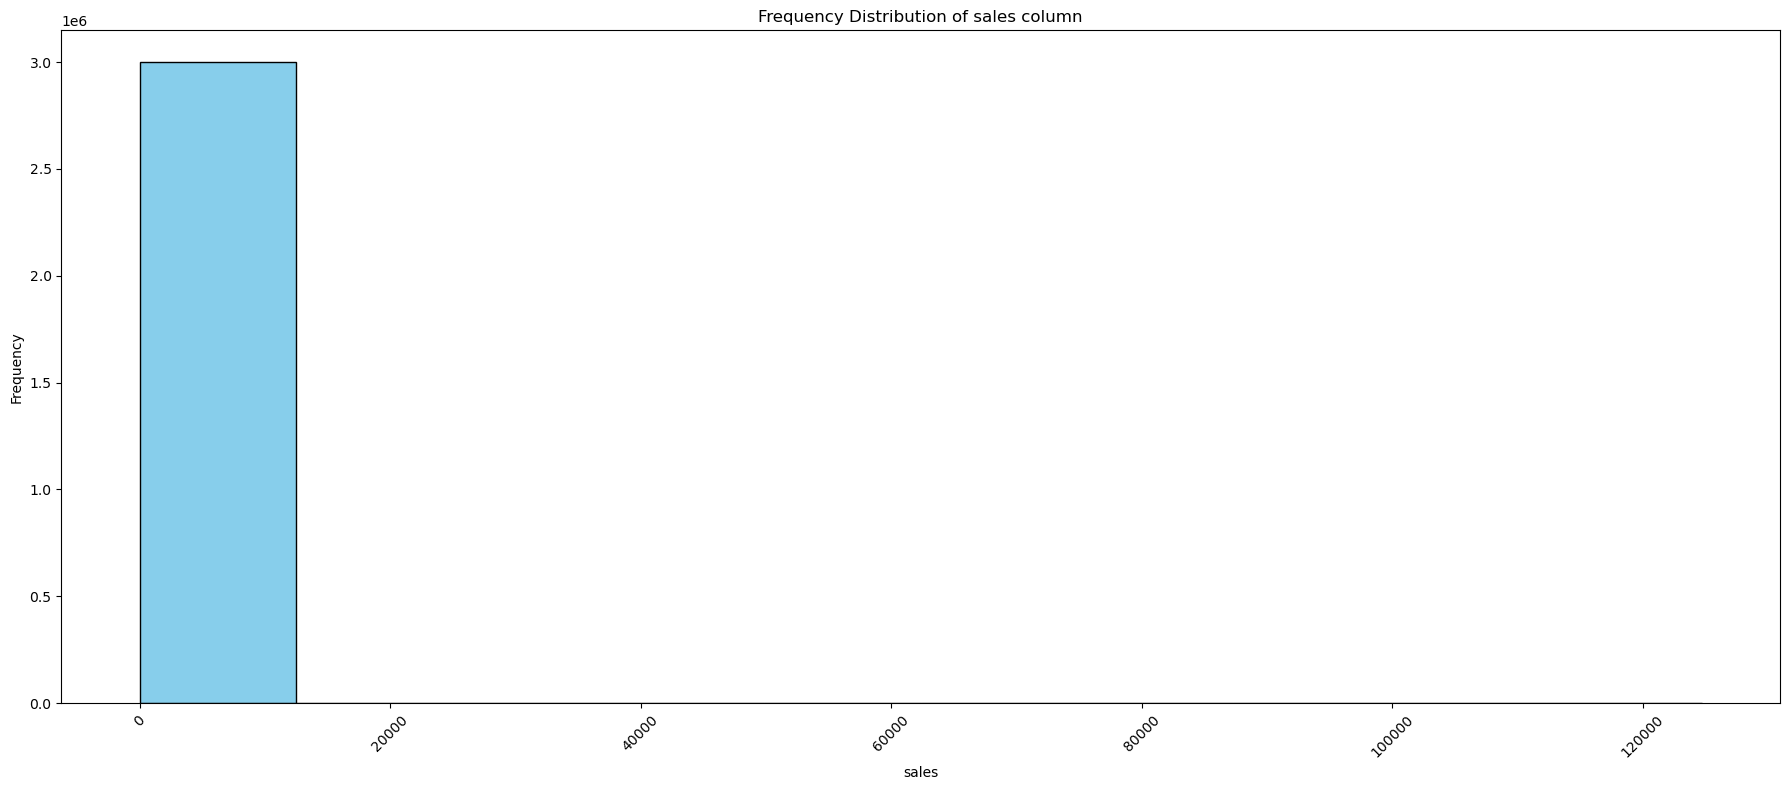

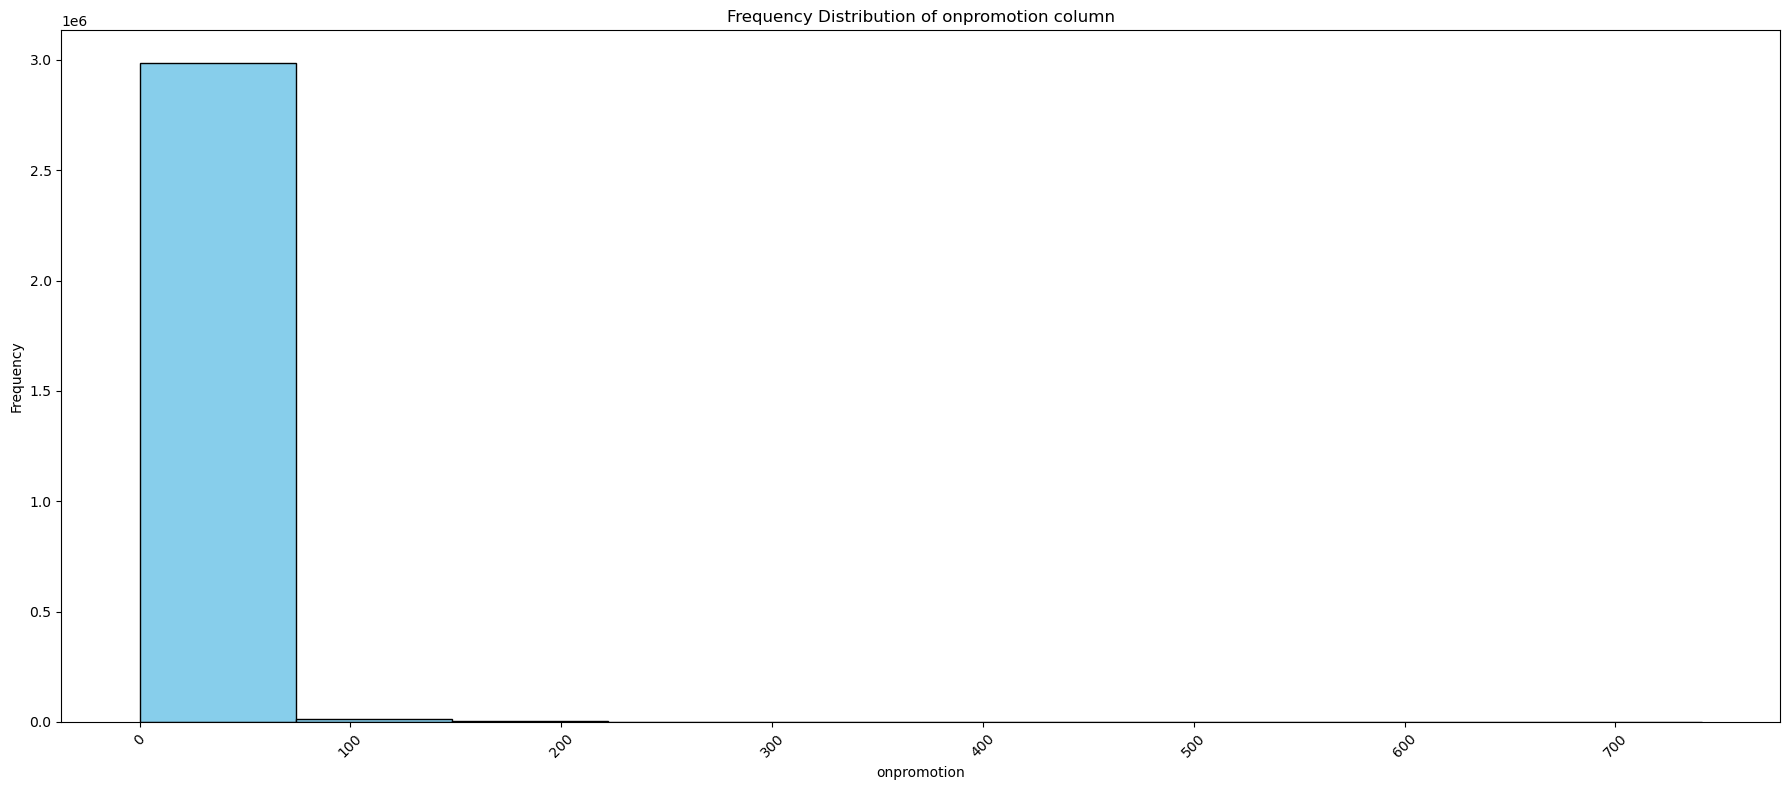

In [41]:
# For numseric columns only
col_to_plot = ['store_nbr', 'sales', 'onpromotion']

for col in col_to_plot:
    # Count the occurrences of each category
    #counts = trfile[col].value_counts()

    plt.figure(figsize=(18, 8))
    plt.hist(trfile[col], bins=10, color='skyblue', edgecolor='black')
    plt.title(f'Frequency Distribution of {col} column')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

#### WORKING ON THE STROE NUMBER TO GET MORE ANALYSIS ON THE FAMILY PRODUCTS:

In [42]:
grp_sales = trfile.groupby('store_nbr')['sales'].sum().reset_index()
grp_sales.columns = ['store_nbr', 'sales']
print(grp_sales)

    store_nbr         sales
0           1  1.414501e+07
1           2  2.155739e+07
2           3  5.048191e+07
3           4  1.890970e+07
4           5  1.559240e+07
5           6  2.518368e+07
6           7  2.695205e+07
7           8  3.049429e+07
8           9  2.640944e+07
9          10  9.613906e+06
10         11  2.832556e+07
11         12  1.065922e+07
12         13  1.052305e+07
13         14  1.138792e+07
14         15  1.145127e+07
15         16  1.098641e+07
16         17  1.803097e+07
17         18  1.325938e+07
18         19  1.304951e+07
19         20  1.292095e+07
20         21  9.255506e+06
21         22  4.090202e+06
22         23  1.165138e+07
23         24  2.376773e+07
24         25  1.142100e+07
25         26  7.755122e+06
26         27  1.918802e+07
27         28  1.838315e+07
28         29  9.725158e+06
29         30  7.382074e+06
30         31  1.774687e+07
31         32  5.951796e+06
32         33  1.417850e+07
33         34  1.709073e+07
34         35  7.676

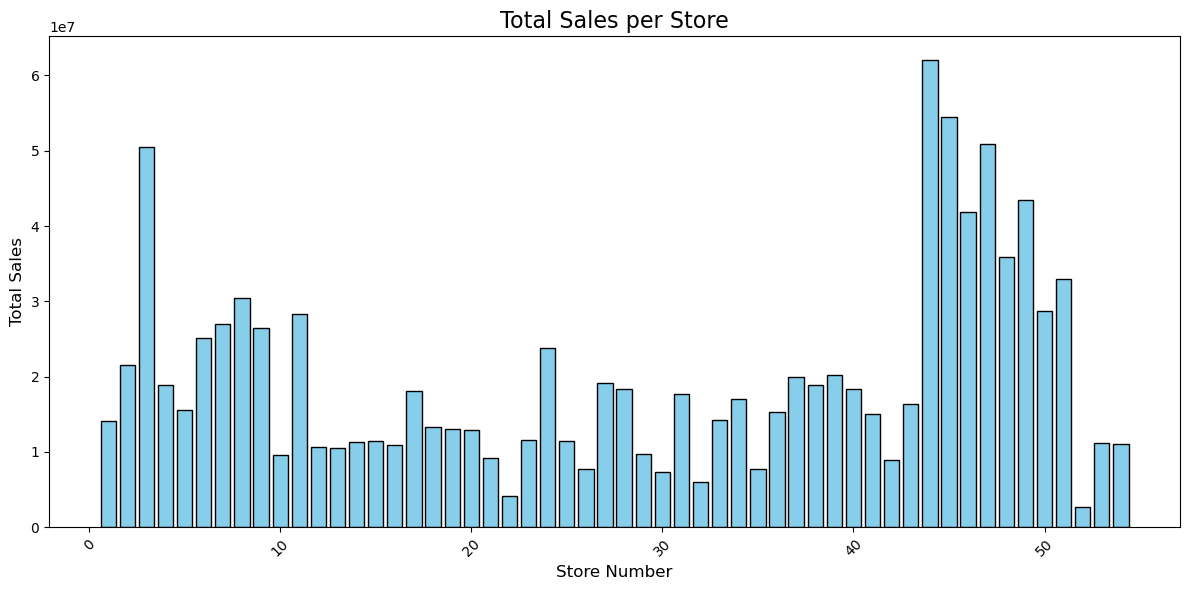

In [43]:
plt.figure(figsize=(12,6))
plt.bar(grp_sales['store_nbr'], grp_sales['sales'], color='skyblue', edgecolor='black')

# Add titles and labels
plt.title('Total Sales per Store', fontsize=16)
plt.xlabel('Store Number', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

# Tight layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
family_sales = trfile.groupby('family')['sales'].sum().reset_index()
family_sales.columns = ['family', 'sales']
print(family_sales)

plt.figure(figsize=(12,6))
plt.bar(family_sales['family'], family_sales['sales'], color='skyblue', edgecolor='black')

# Add titles and labels
plt.title('Total Sales for each product', fontsize=16)
plt.xlabel('family', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)

# Rotate x-axis labels for readability
plt.xticks(rotation=80)

# Tight layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

SyntaxError: invalid decimal literal (656322222.py, line 1)

In [45]:
# Group by store_nbr and family, then sum the sales
grp_sales_family = (
    trfile.groupby(['store_nbr', 'family'])['sales']
    .sum()
    .reset_index()
    .sort_values(by=['store_nbr', 'sales'], ascending=[True, False])
)

print(grp_sales_family.head())


    store_nbr     family         sales
12          1  GROCERY I  3.743823e+06
3           1  BEVERAGES  2.673769e+06
30          1    PRODUCE  2.443330e+06
7           1   CLEANING  1.078525e+06
8           1      DAIRY  1.054354e+06


In [46]:
import pandas as pd
import matplotlib.pyplot as plt

# 1) Load & ensure datetime
#trfile = pd.read_csv('trfile.csv')
trfile['date'] = pd.to_datetime(trfile['date'], errors='coerce')
trfile['sales'] = pd.to_numeric(trfile['sales'], errors='coerce').fillna(0)

# 2) Weekly sales per store (weeks ending Sunday; change to 'W-MON' if you prefer)
weekly_sales = (
    trfile
      .groupby(['store_nbr', pd.Grouper(key='date', freq='W-SUN')])['sales']
      .sum()
      .reset_index(name='weekly_sales')
      .sort_values(['store_nbr','date'])
)

print(weekly_sales.head())


   store_nbr       date  weekly_sales
0          1 2013-01-06  27728.143012
1          1 2013-01-13  36970.075954
2          1 2013-01-20  36721.333008
3          1 2013-01-27  34954.864030
4          1 2013-02-03  34247.464010


In [47]:
# idx of max/min weekly sales within each store
idx_max = weekly_sales.groupby('store_nbr')['weekly_sales'].idxmax()
idx_min = weekly_sales.groupby('store_nbr')['weekly_sales'].idxmin()

high_weeks = weekly_sales.loc[idx_max].rename(
    columns={'date':'high_week_end', 'weekly_sales':'high_week_sales'}
)
low_weeks = weekly_sales.loc[idx_min].rename(
    columns={'date':'low_week_end', 'weekly_sales':'low_week_sales'}
)

extremes = (
    high_weeks[['store_nbr','high_week_end','high_week_sales']]
    .merge(low_weeks[['store_nbr','low_week_end','low_week_sales']], on='store_nbr')
    .sort_values('store_nbr')
)
print(extremes)
# extremes.to_csv('store_weekly_high_low.csv', index=False)


    store_nbr high_week_end  high_week_sales low_week_end  low_week_sales
0           1    2016-04-24    107324.651000   2017-08-20    20256.865018
1           2    2016-05-08    227202.988049   2017-08-20    23407.721022
2           3    2017-01-08    348237.441140   2017-08-20    63029.306026
3           4    2017-01-08    128094.792889   2017-08-20    20620.976000
4           5    2014-12-28    106756.470985   2017-08-20    17715.267900
5           6    2017-01-08    173903.036905   2017-08-20    28055.814025
6           7    2016-04-24    190462.660180   2017-08-20    38701.895980
7           8    2016-04-24    220284.548971   2017-08-20    36864.013000
8           9    2017-01-08    182291.896903   2017-08-20    34615.186000
9          10    2015-12-27     66843.412050   2017-08-20    13043.333000
10         11    2017-03-05    191497.214055   2017-08-20    40593.659000
11         12    2015-08-16     73497.199980   2015-04-05        0.000000
12         13    2015-04-12     69947.

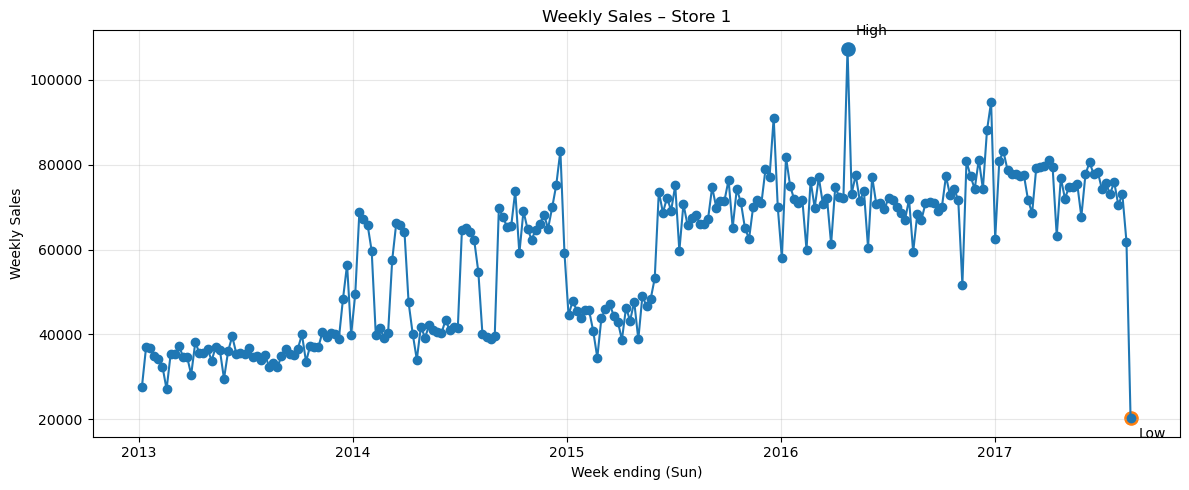

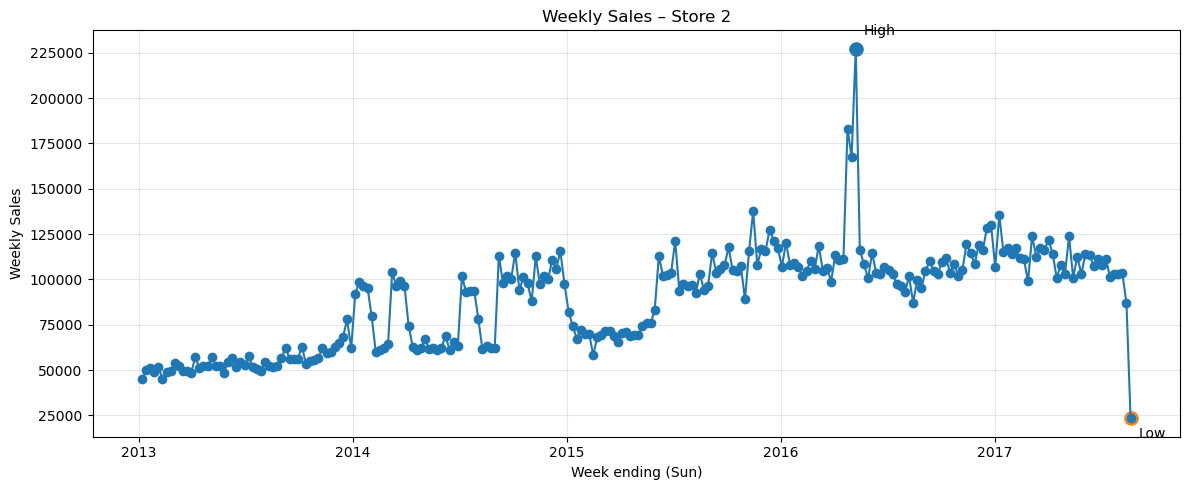

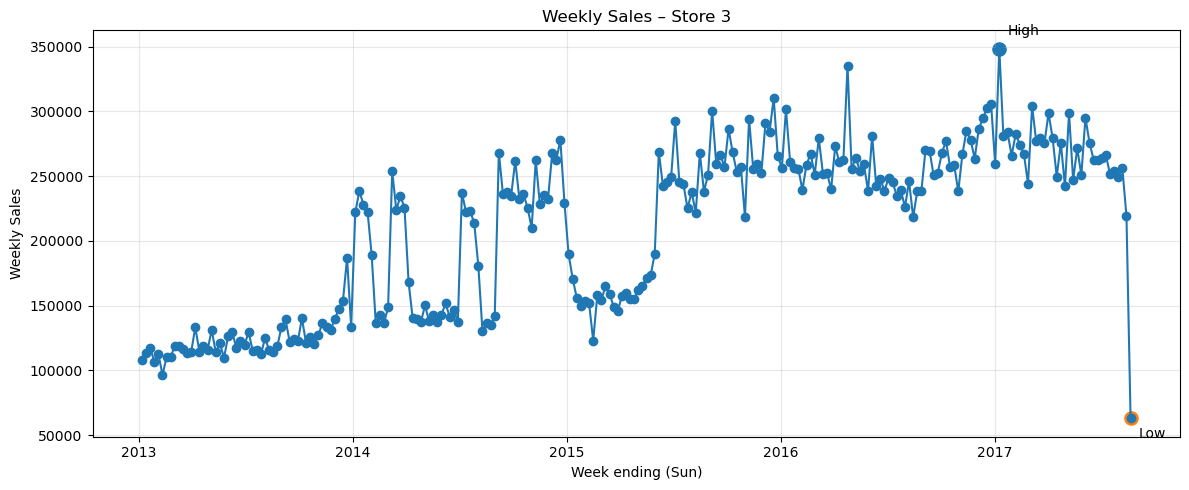

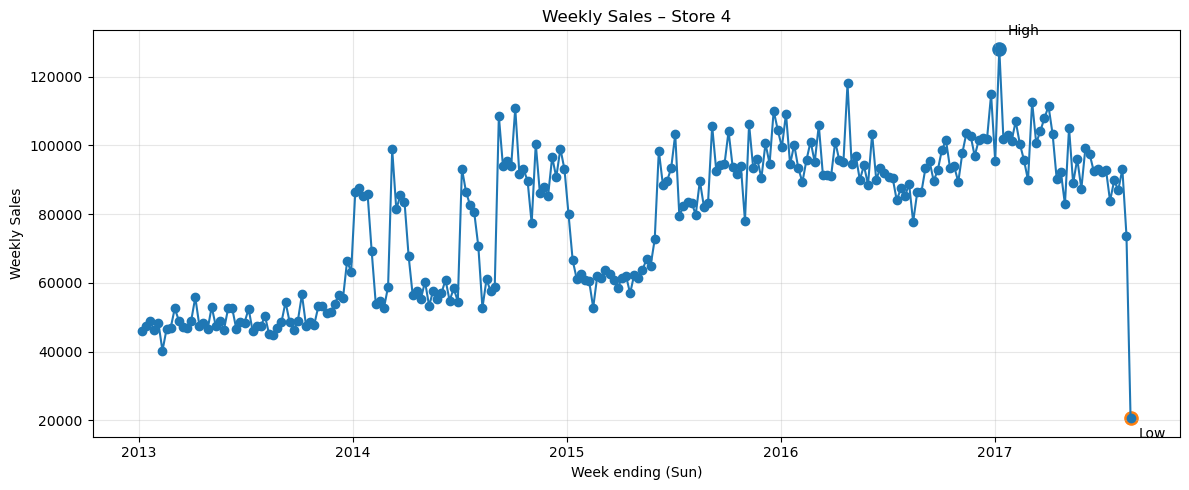

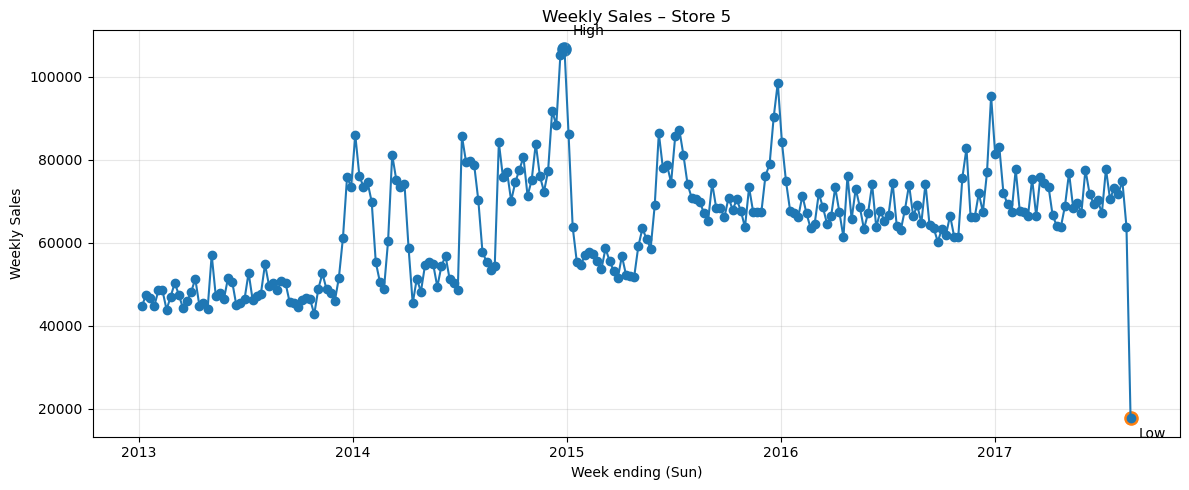

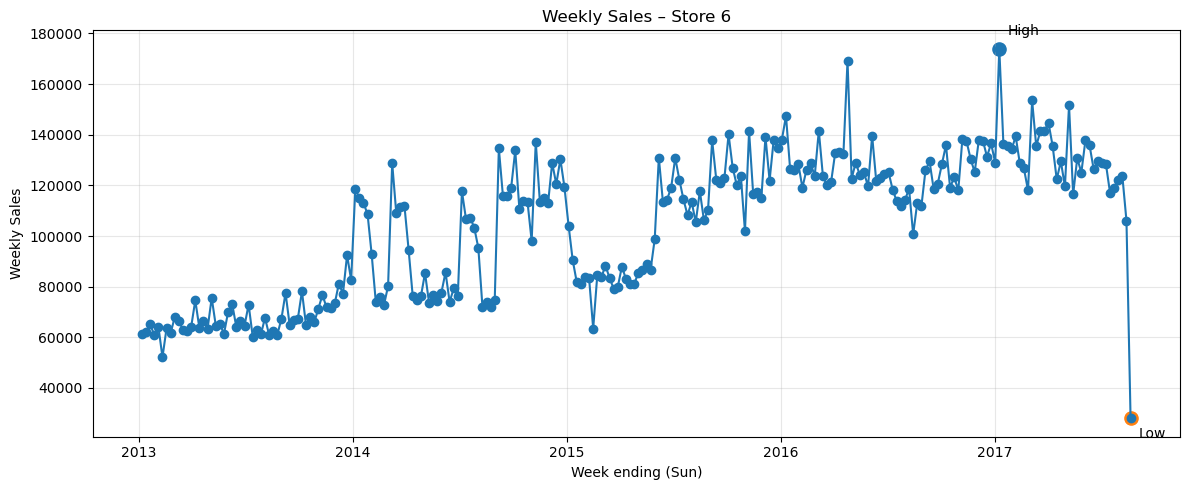

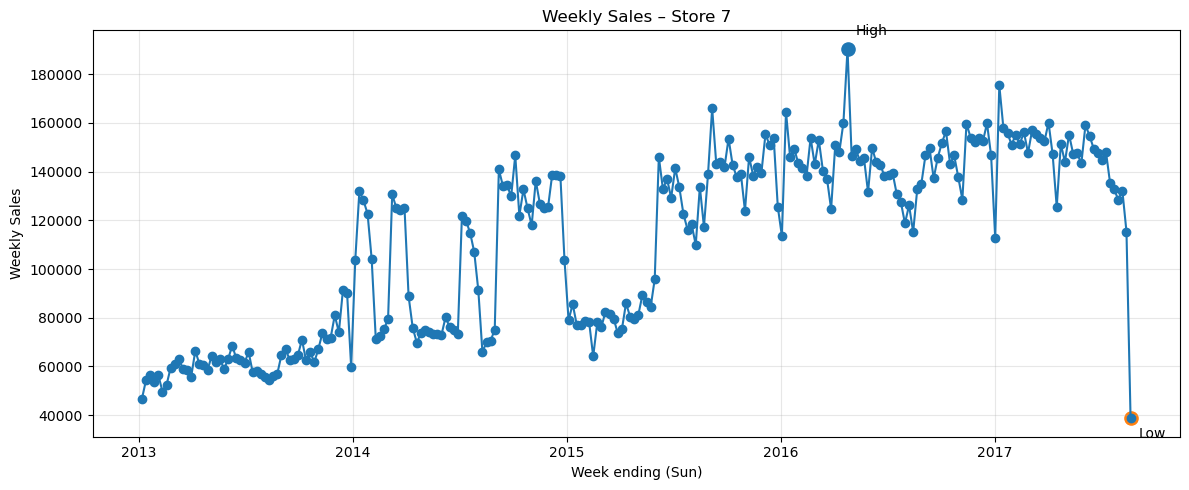

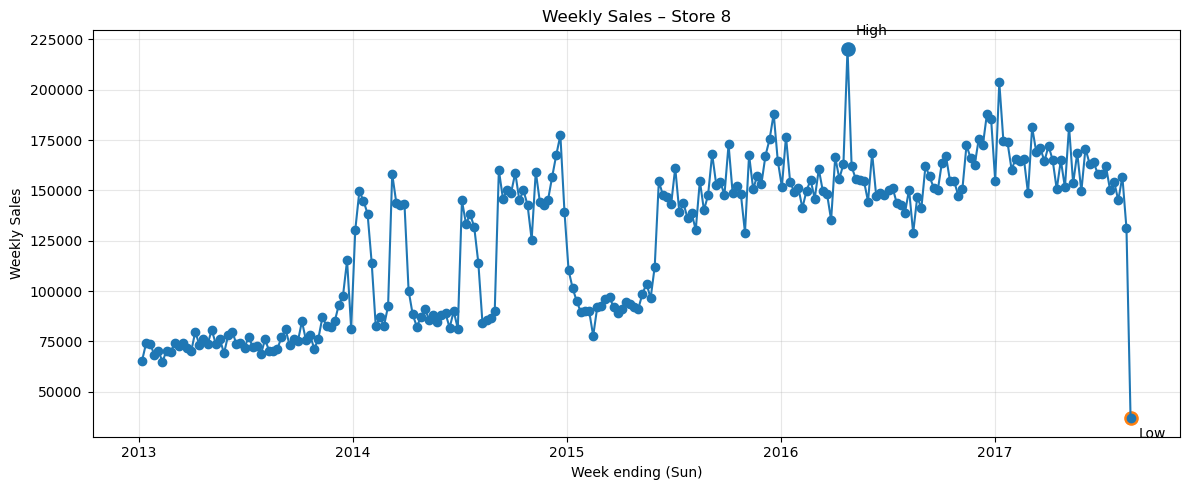

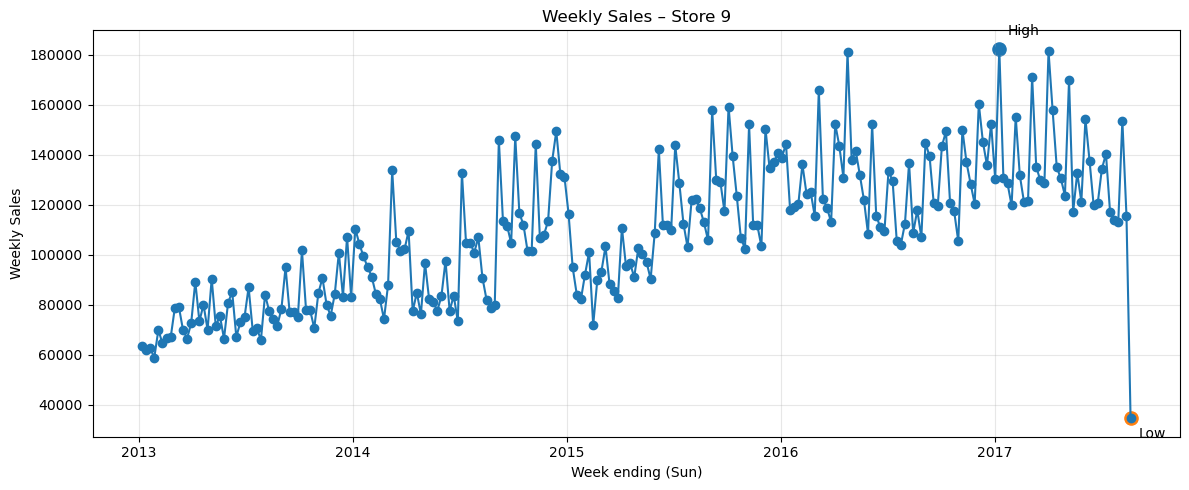

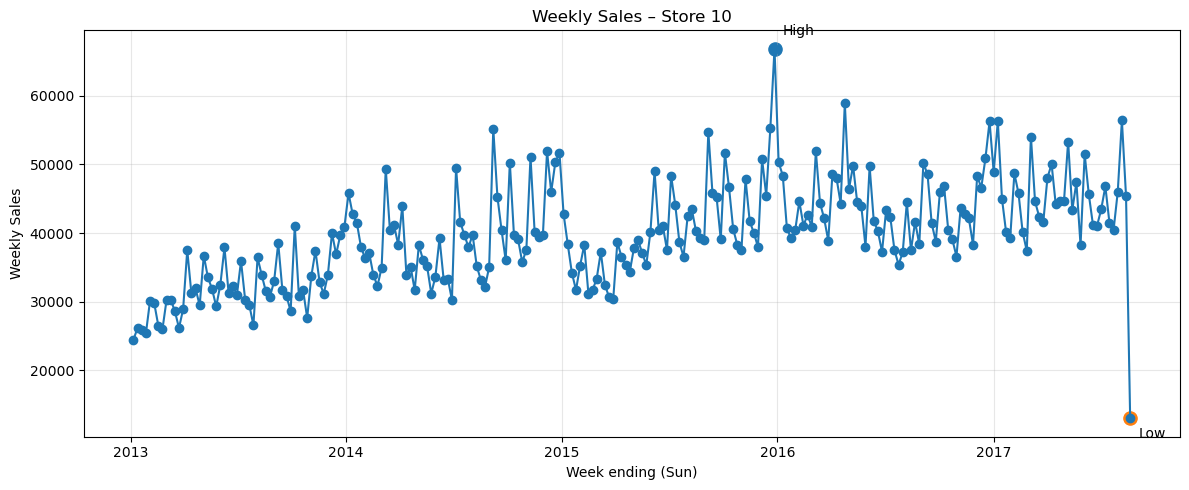

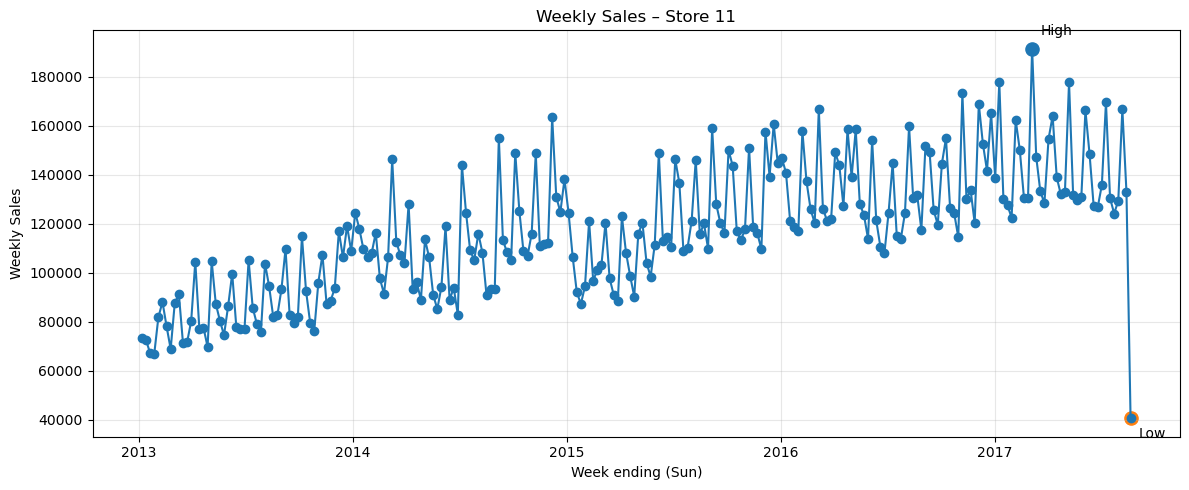

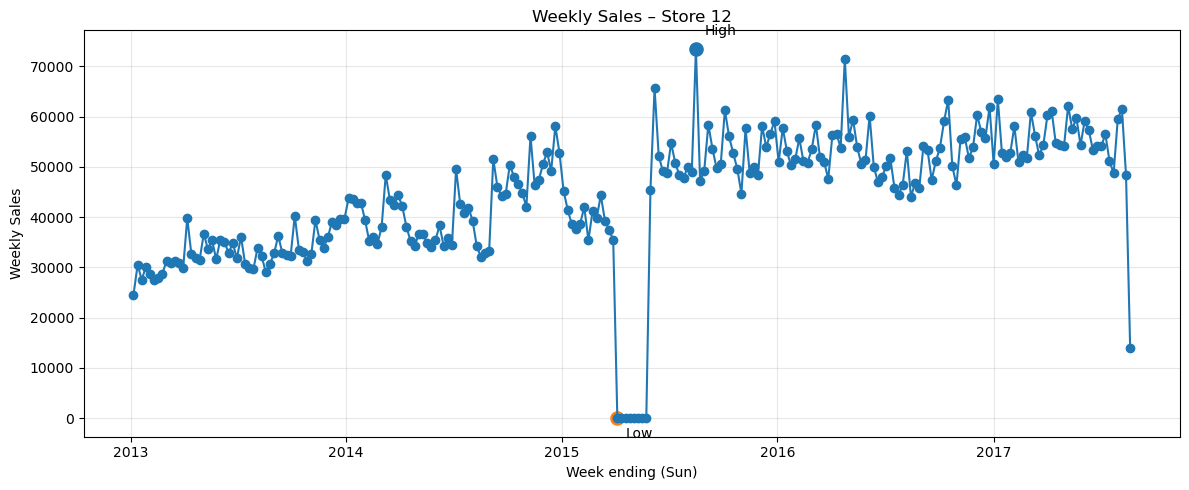

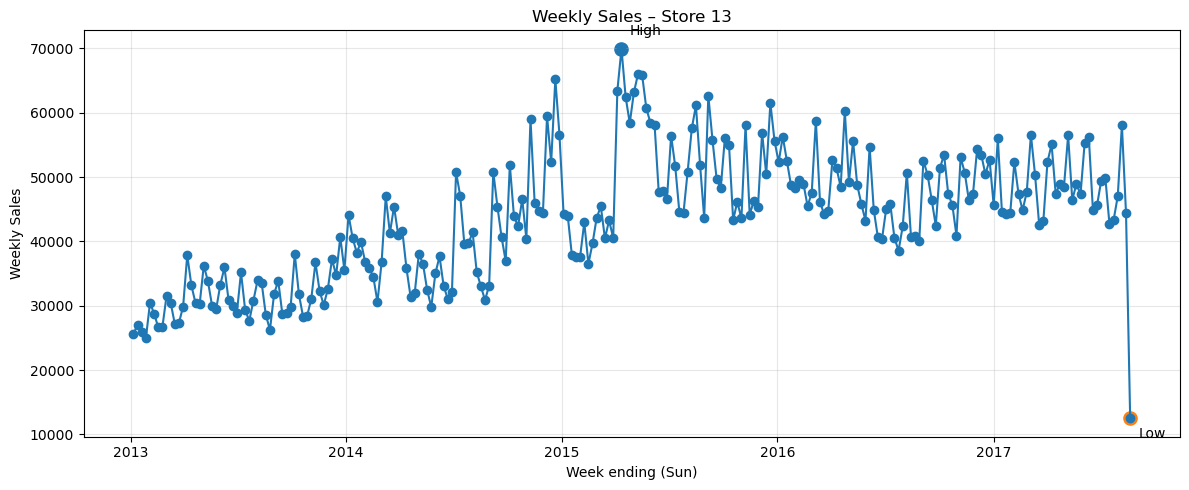

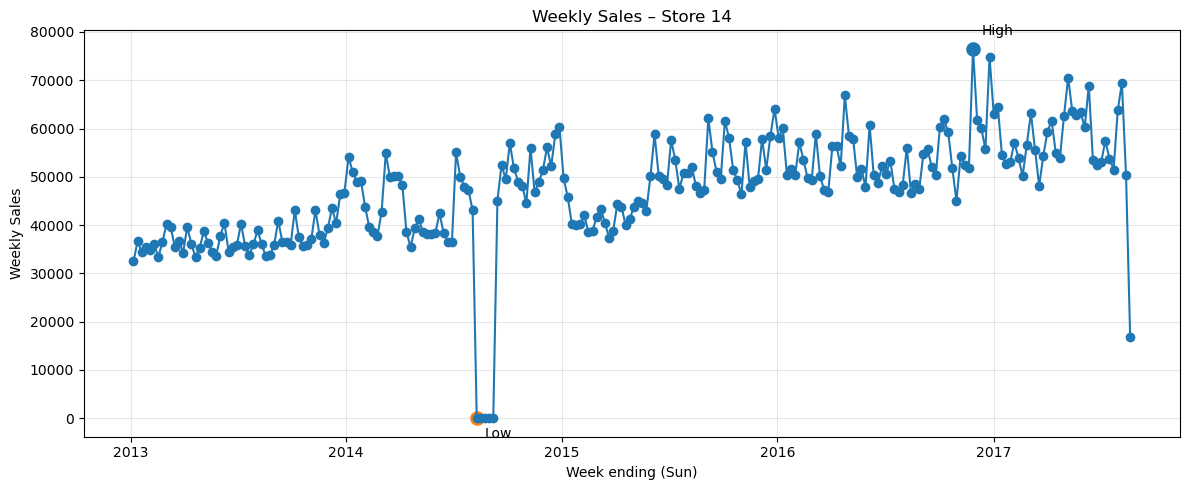

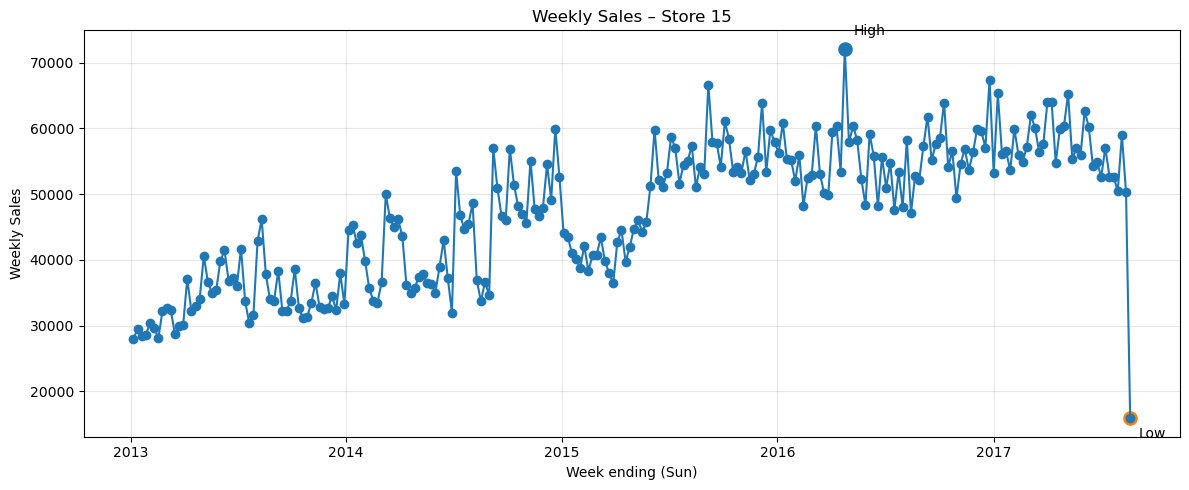

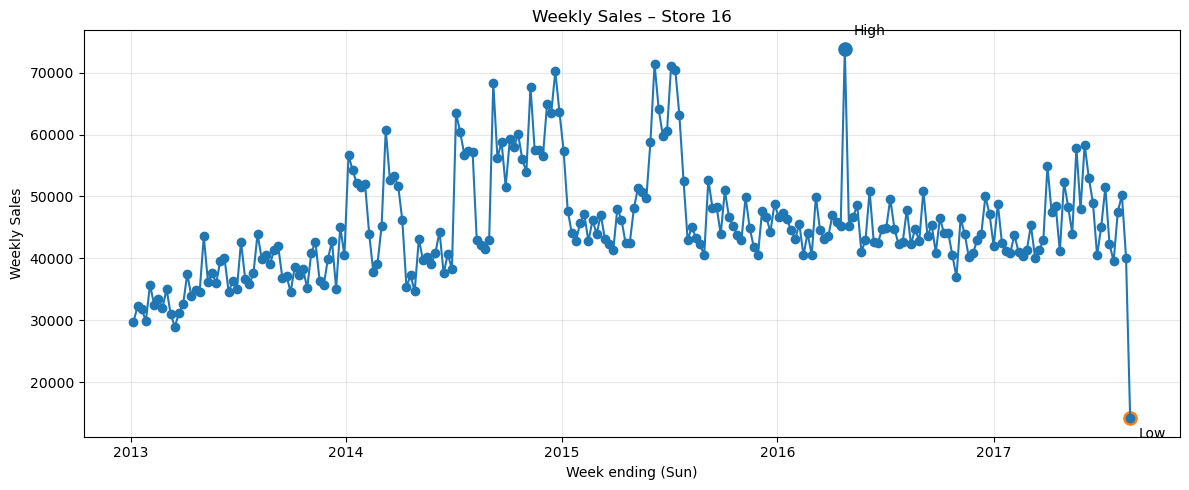

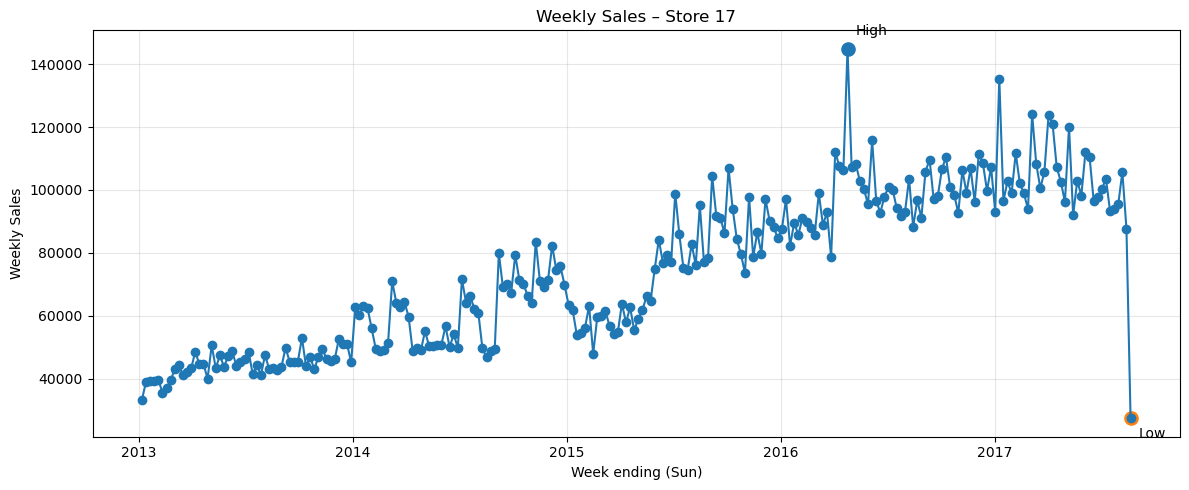

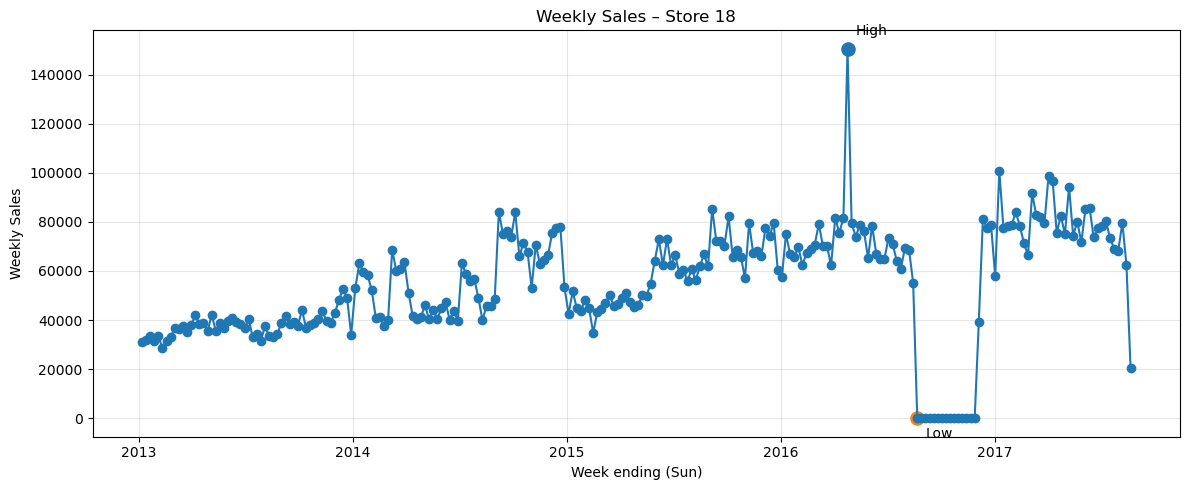

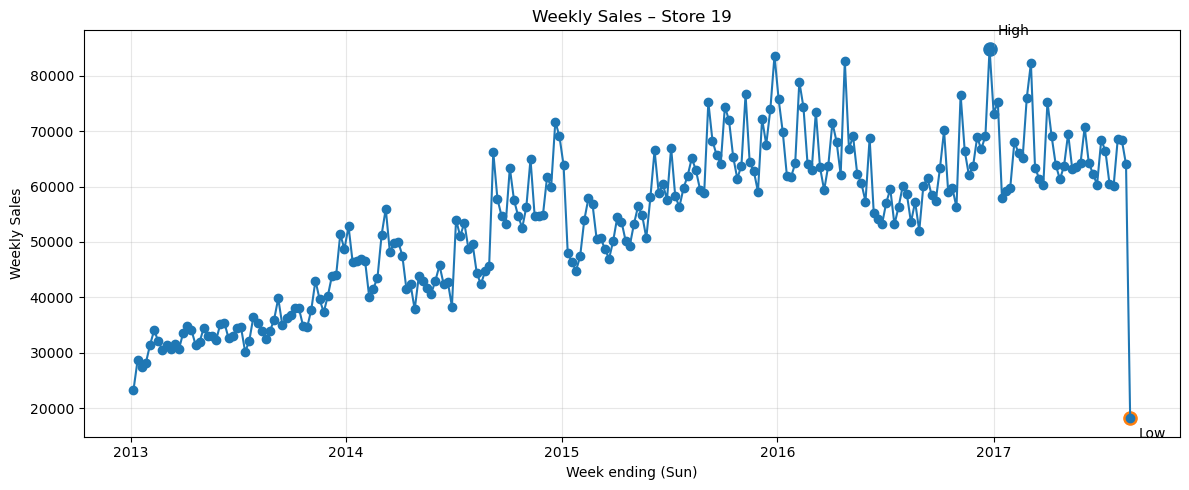

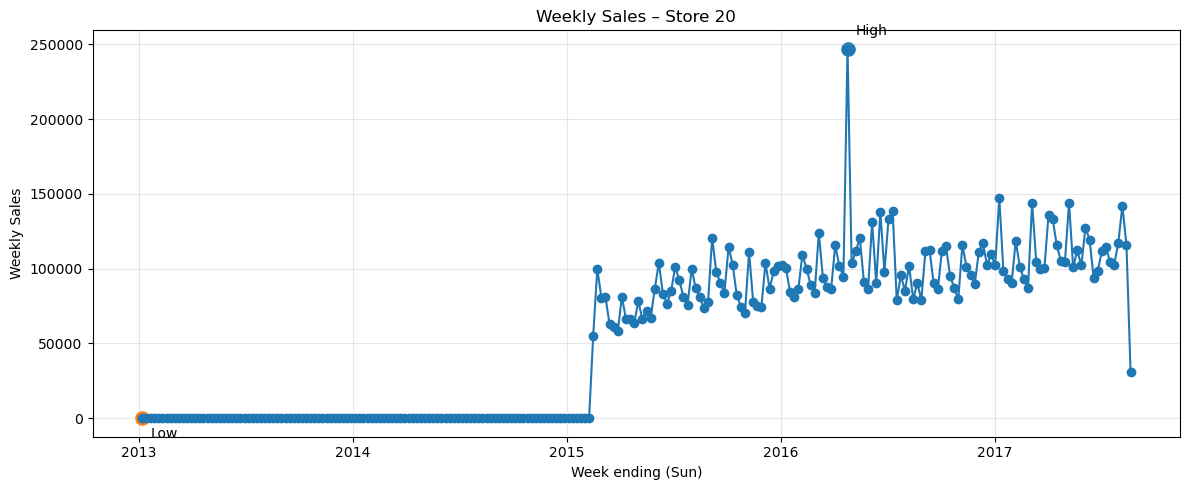

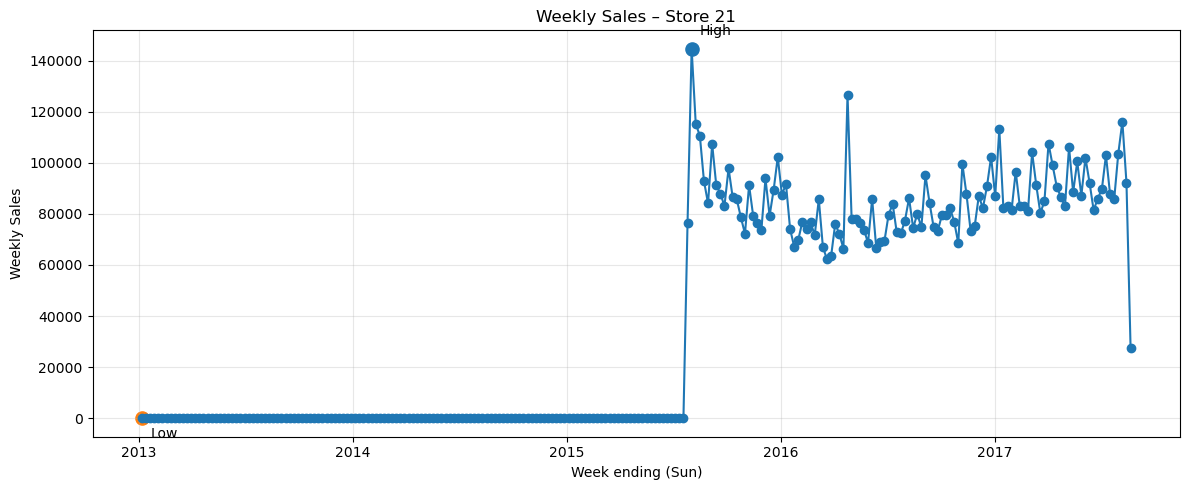

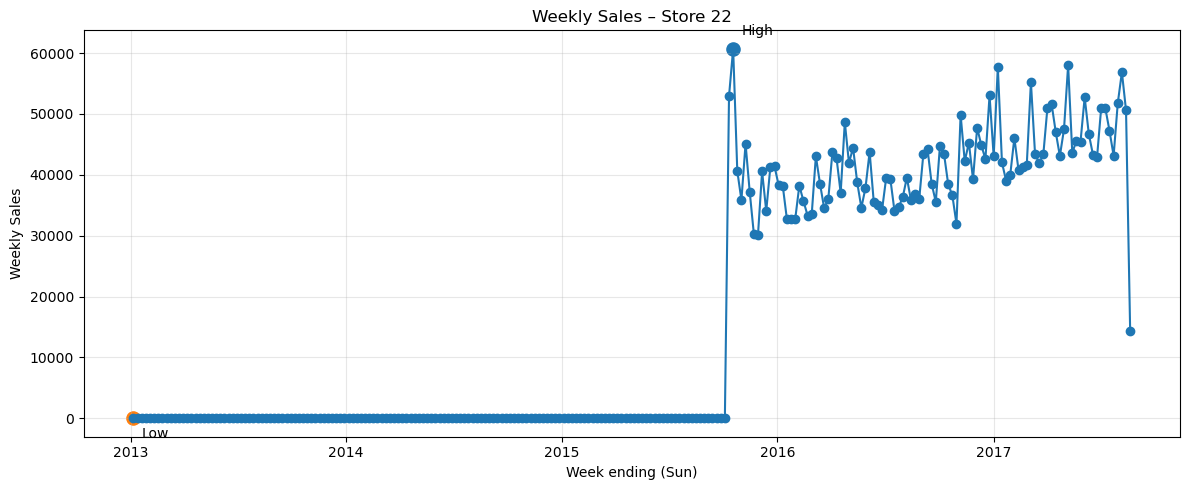

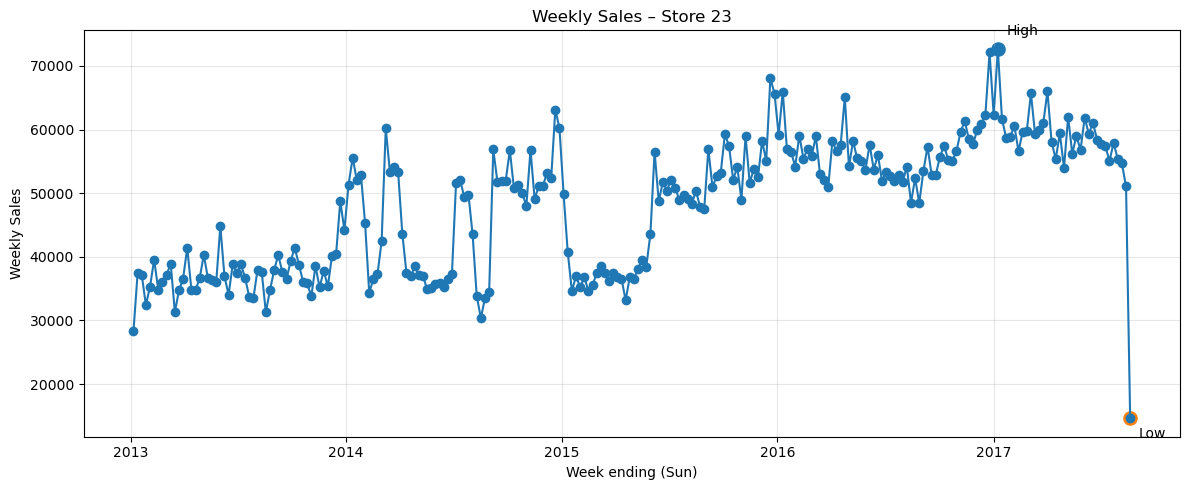

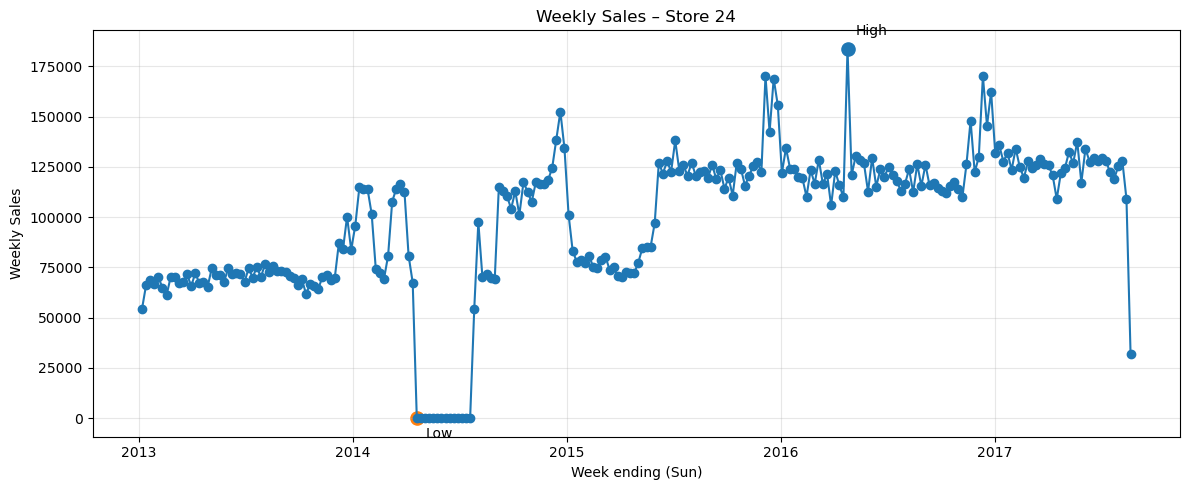

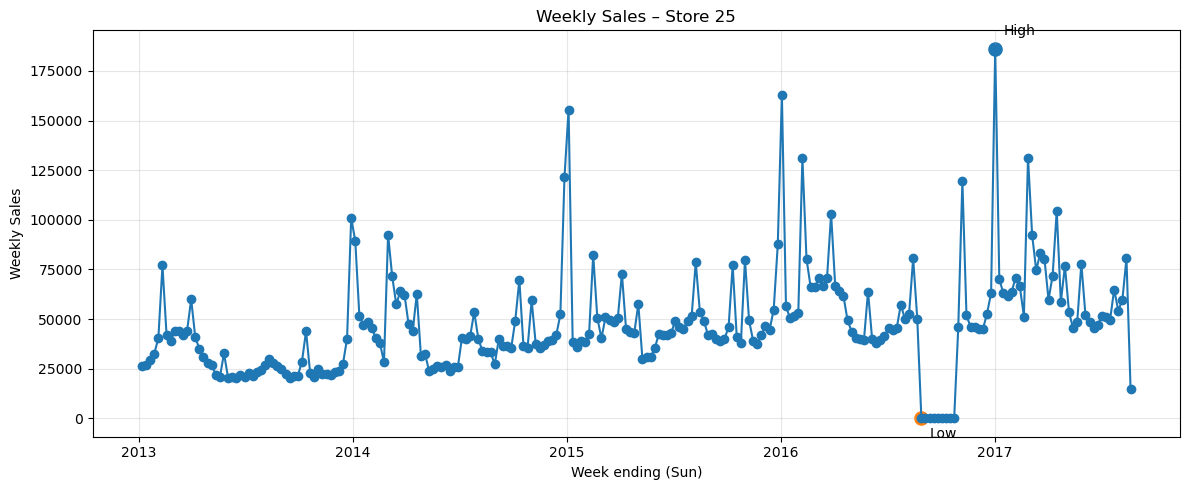

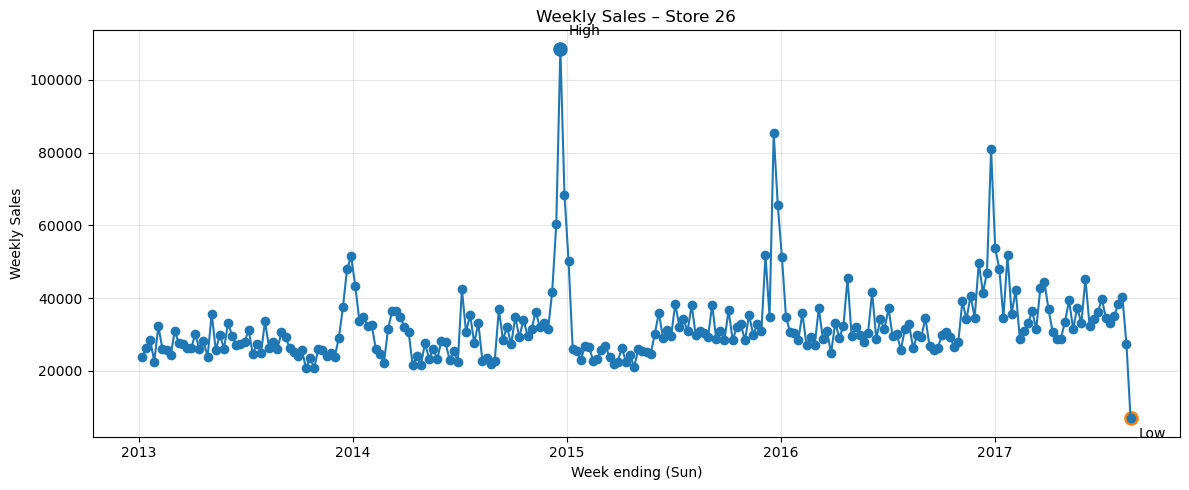

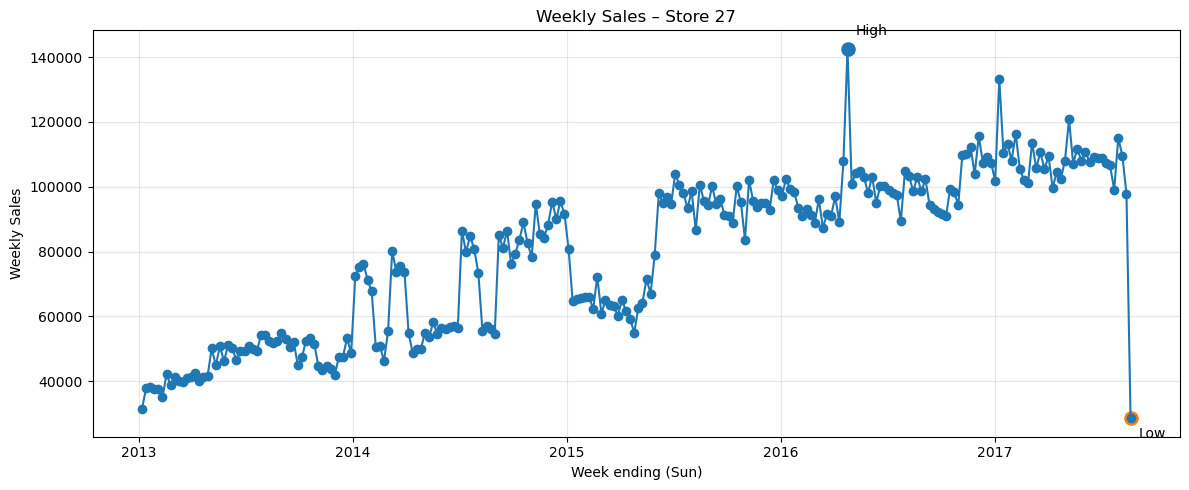

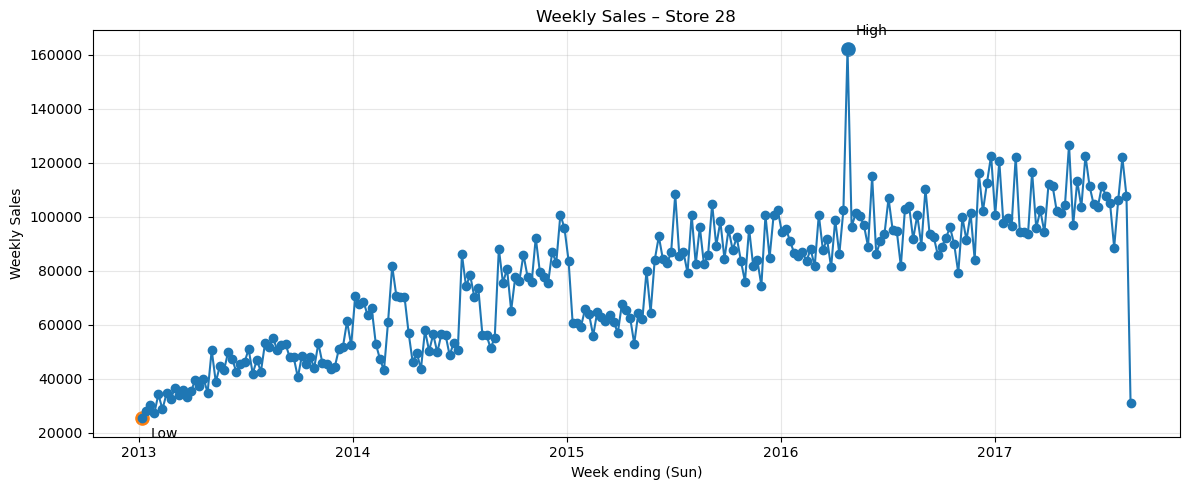

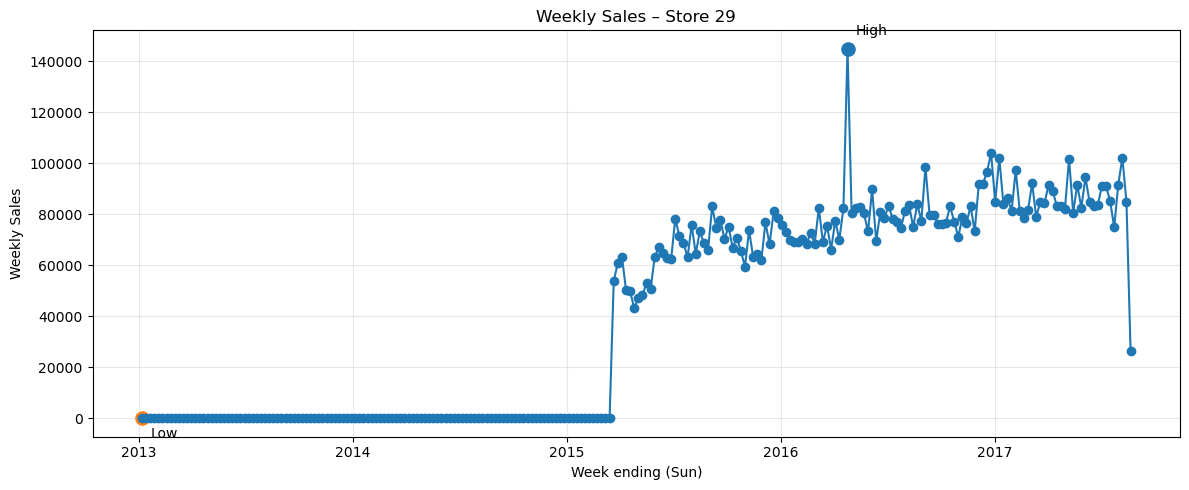

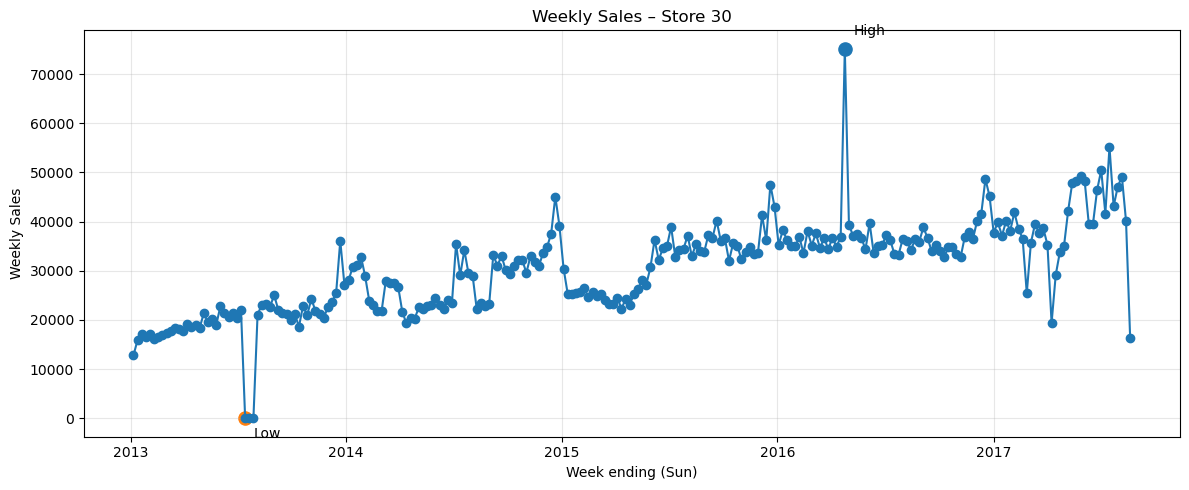

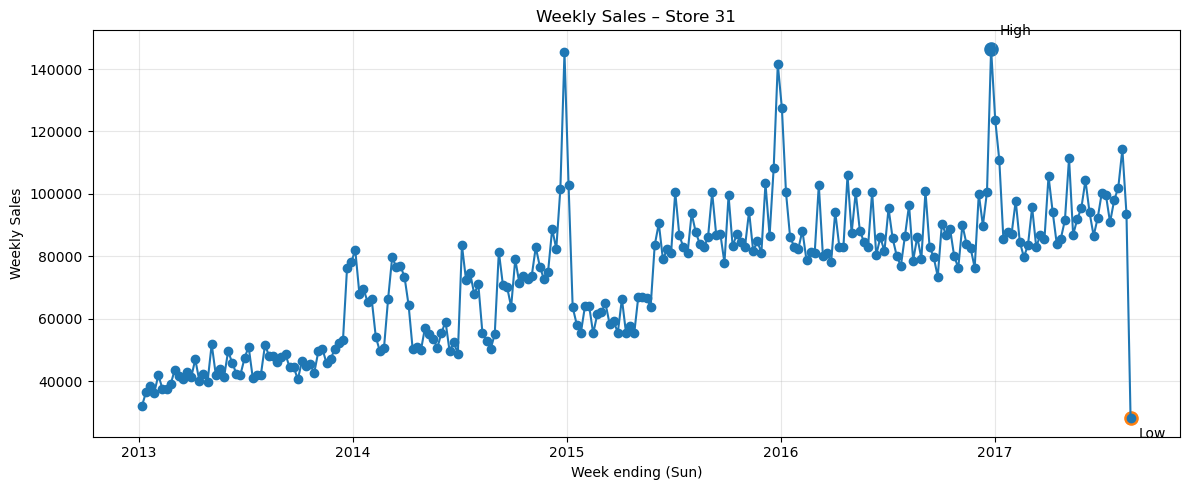

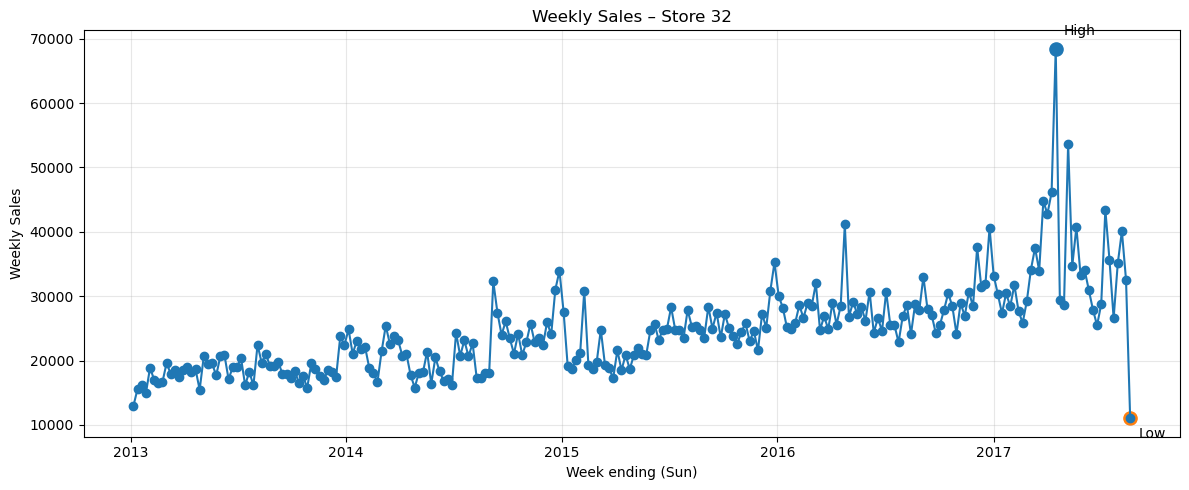

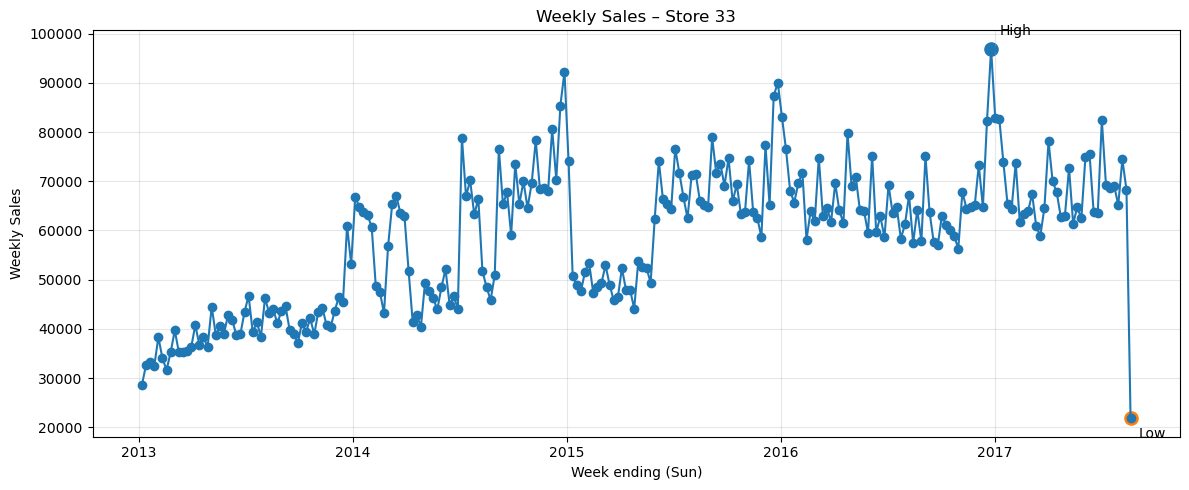

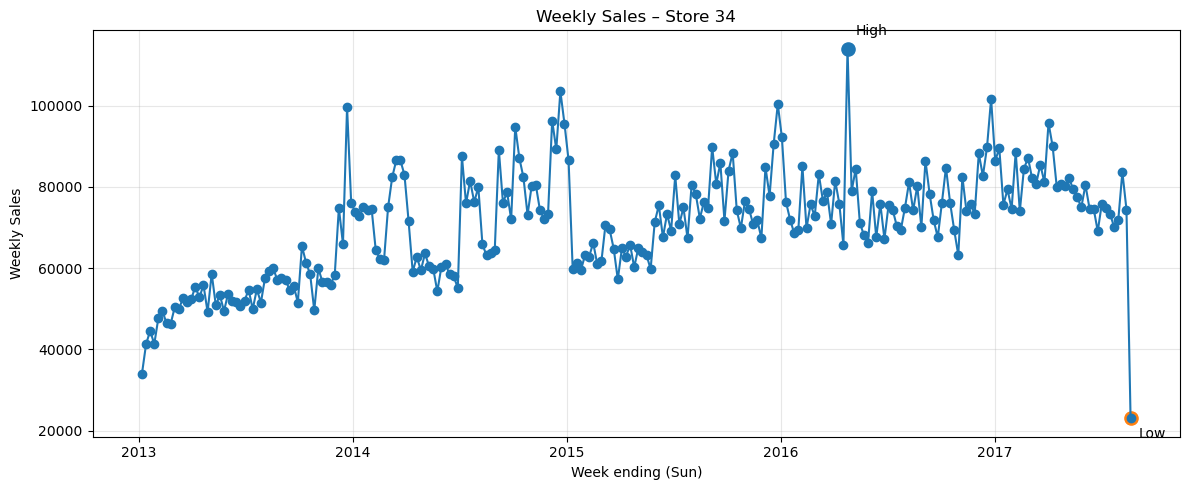

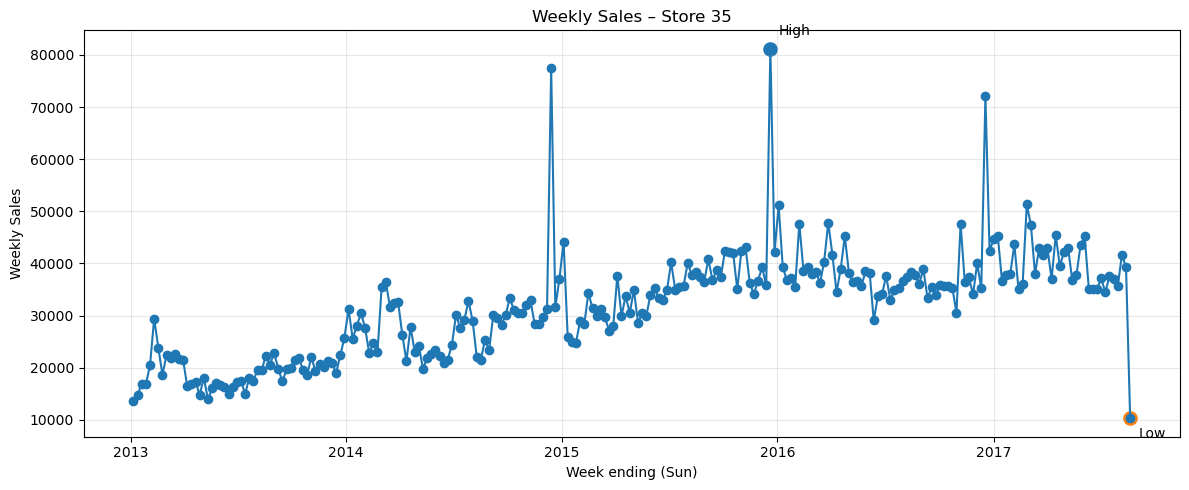

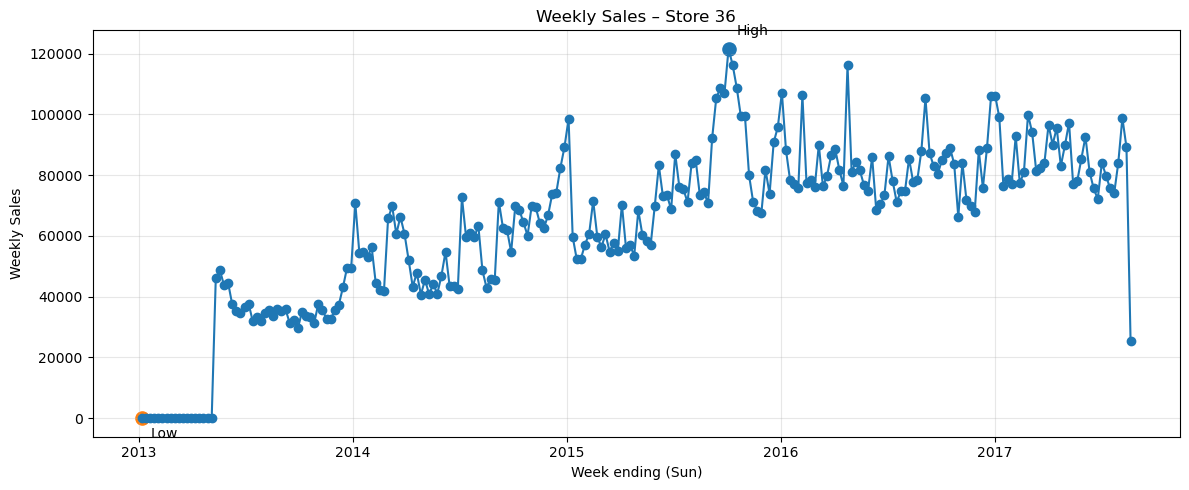

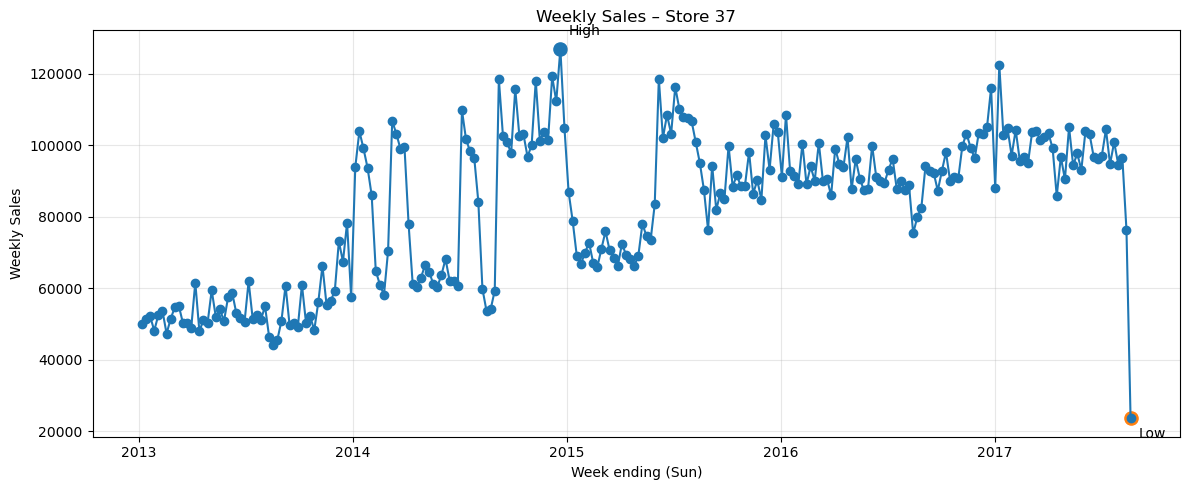

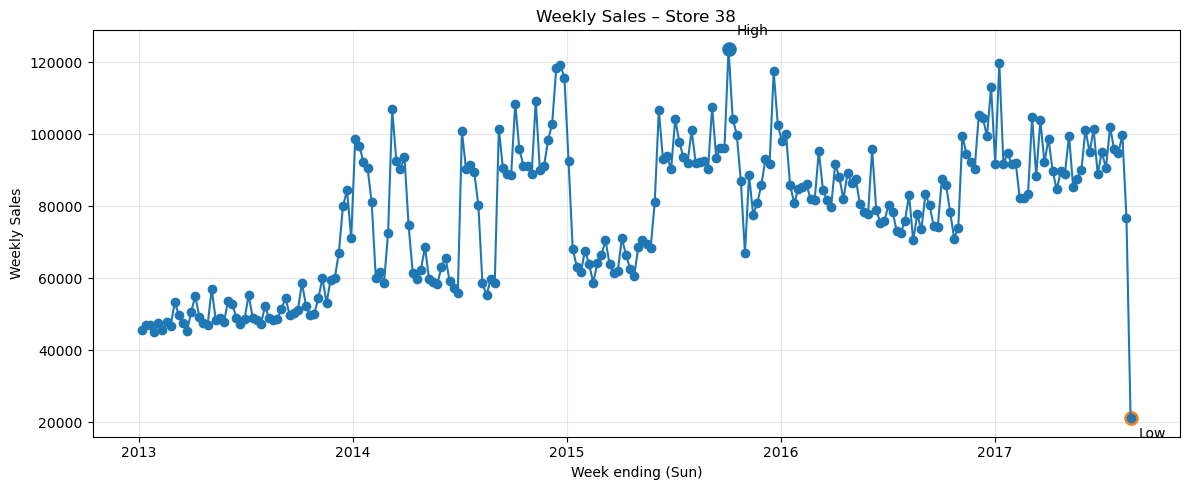

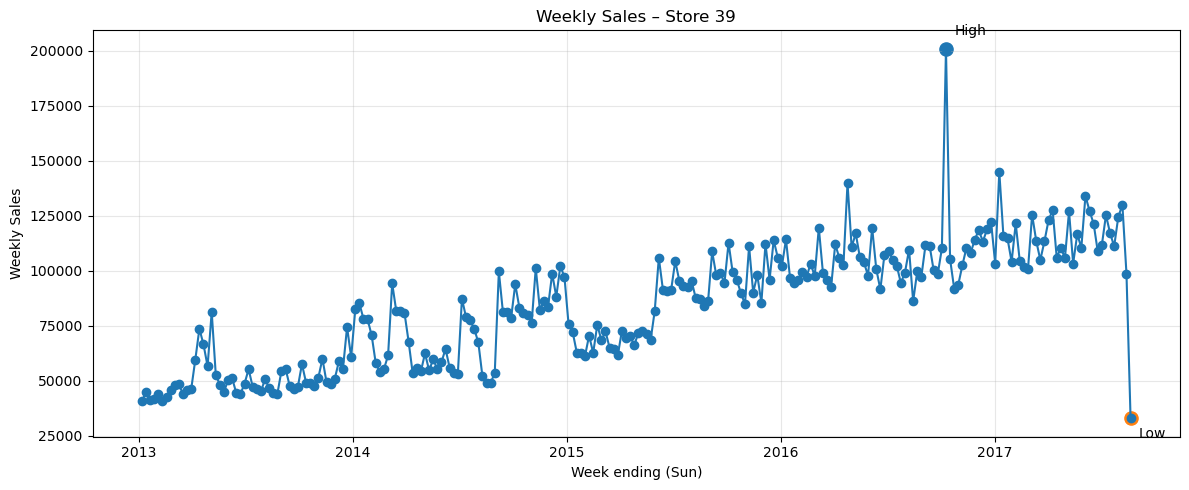

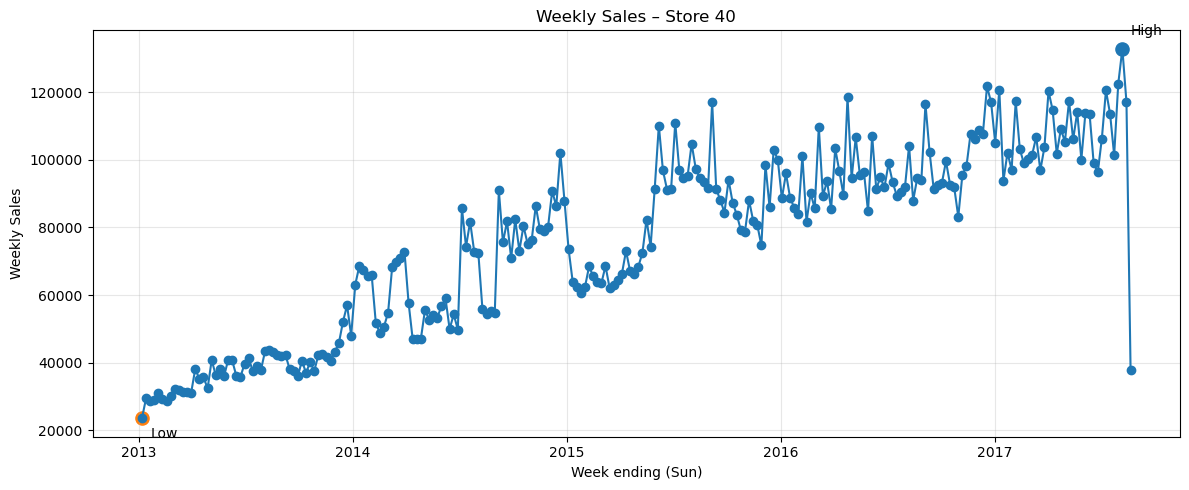

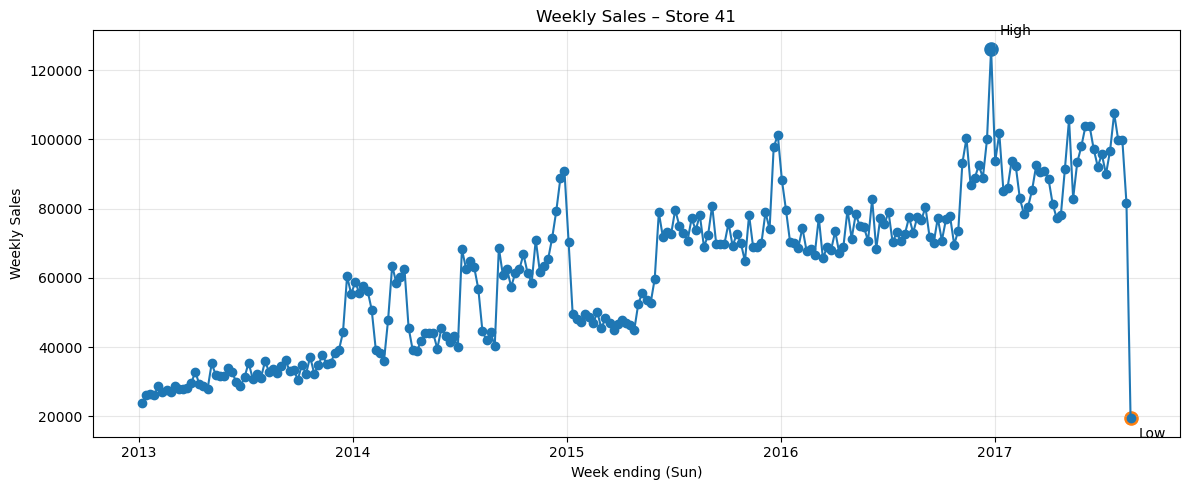

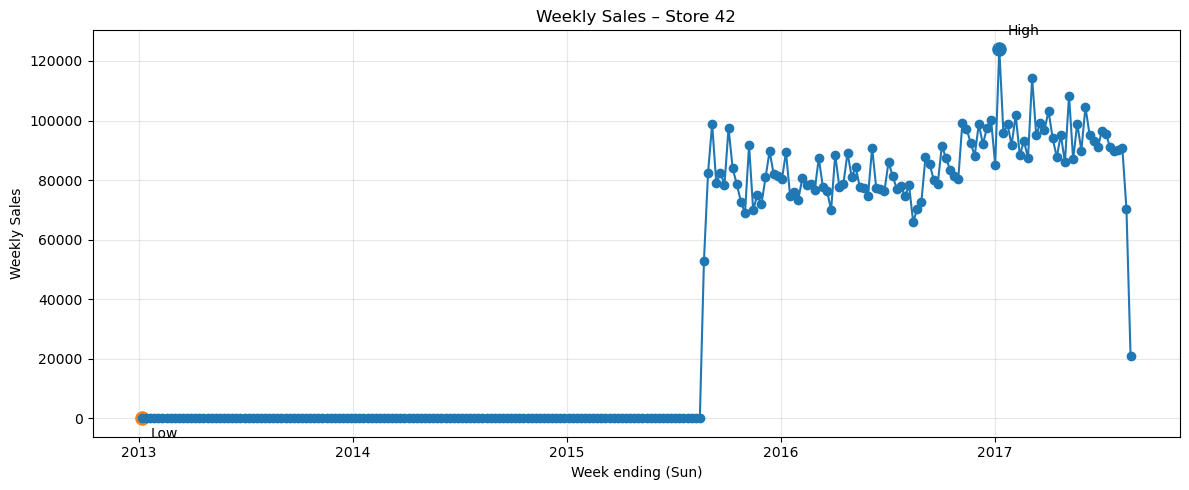

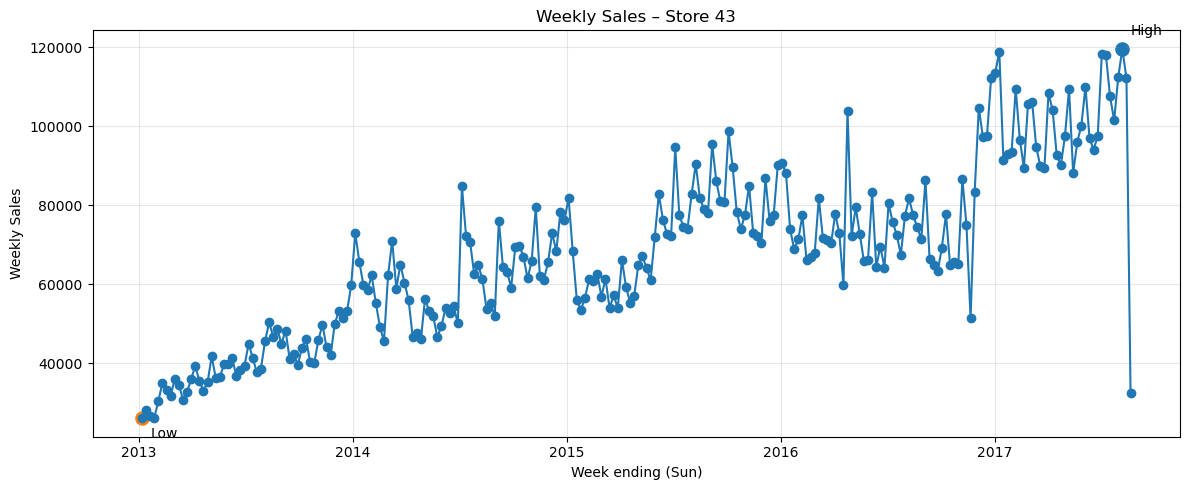

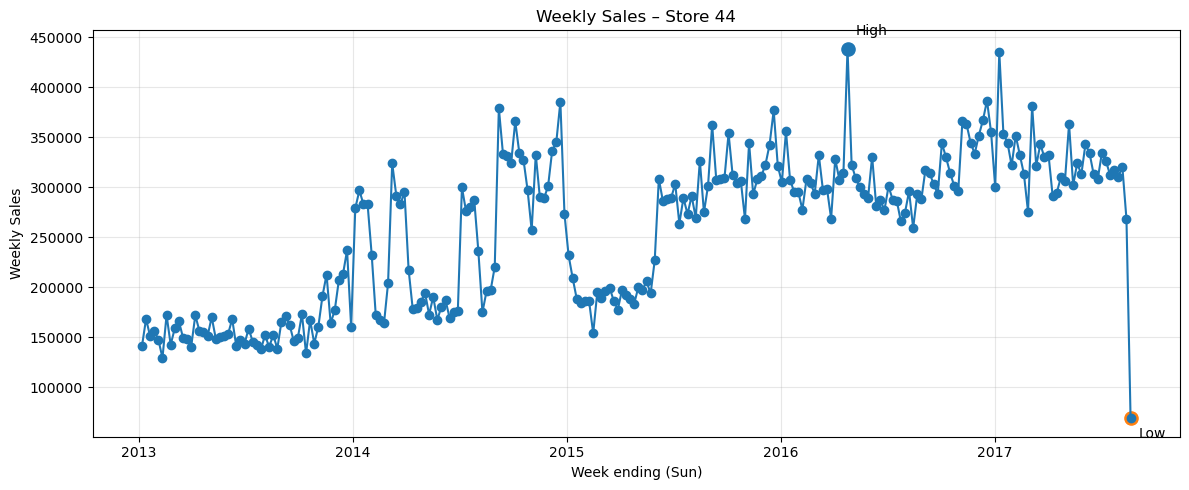

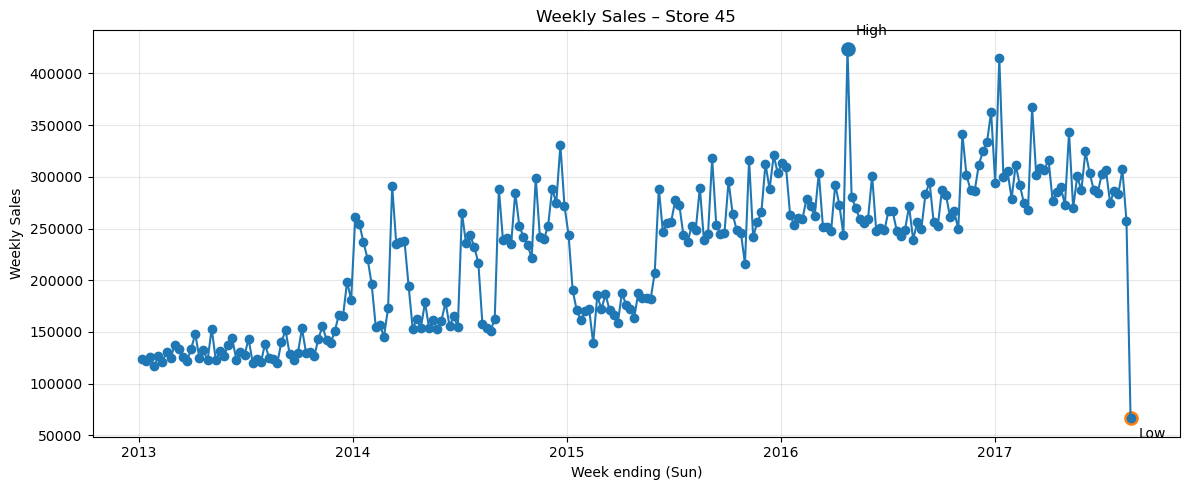

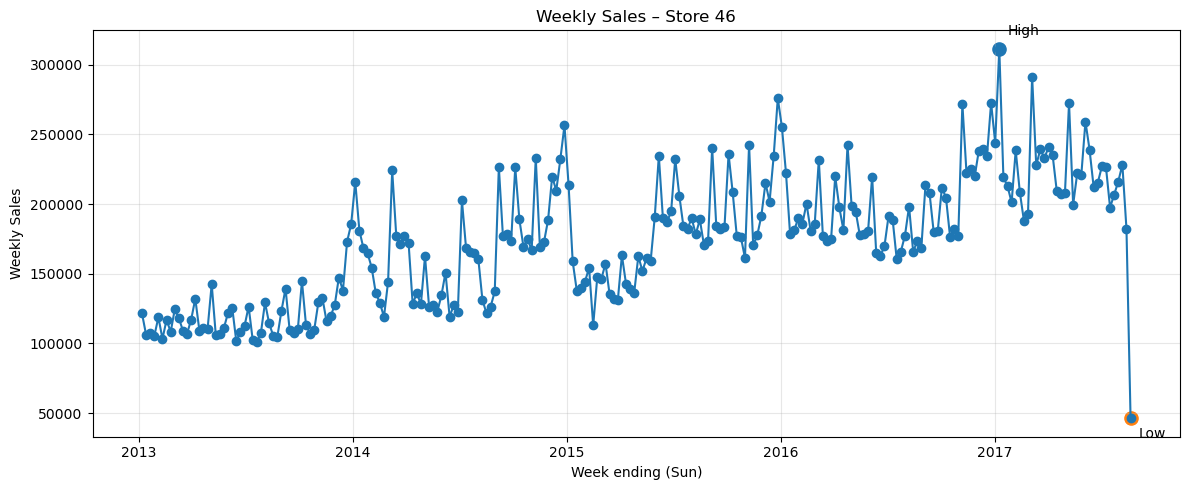

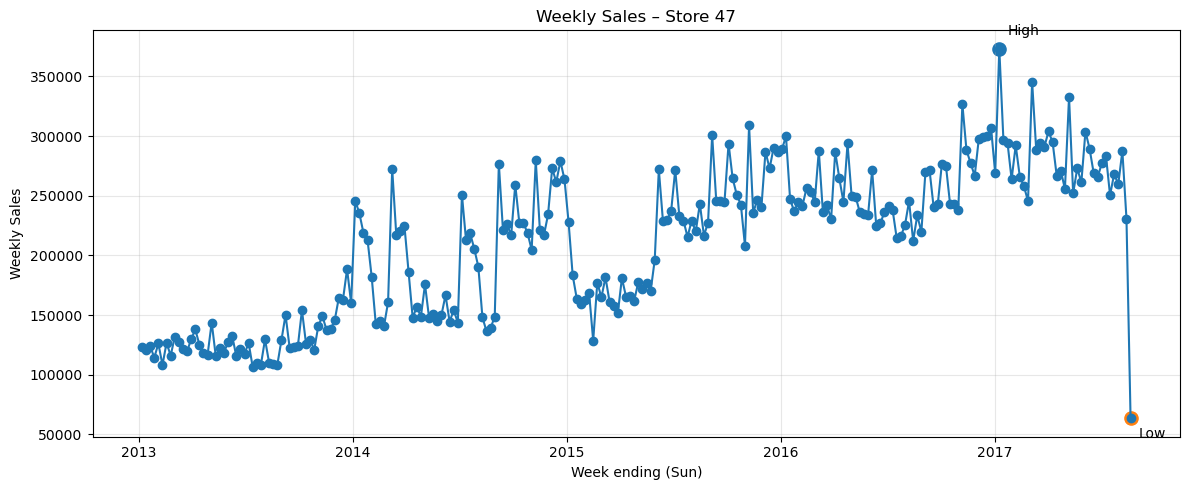

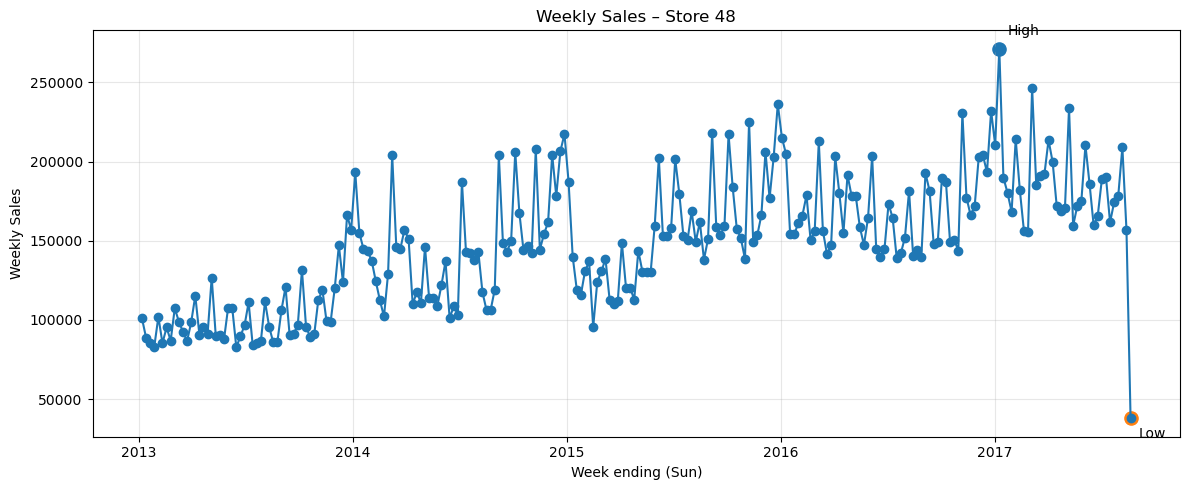

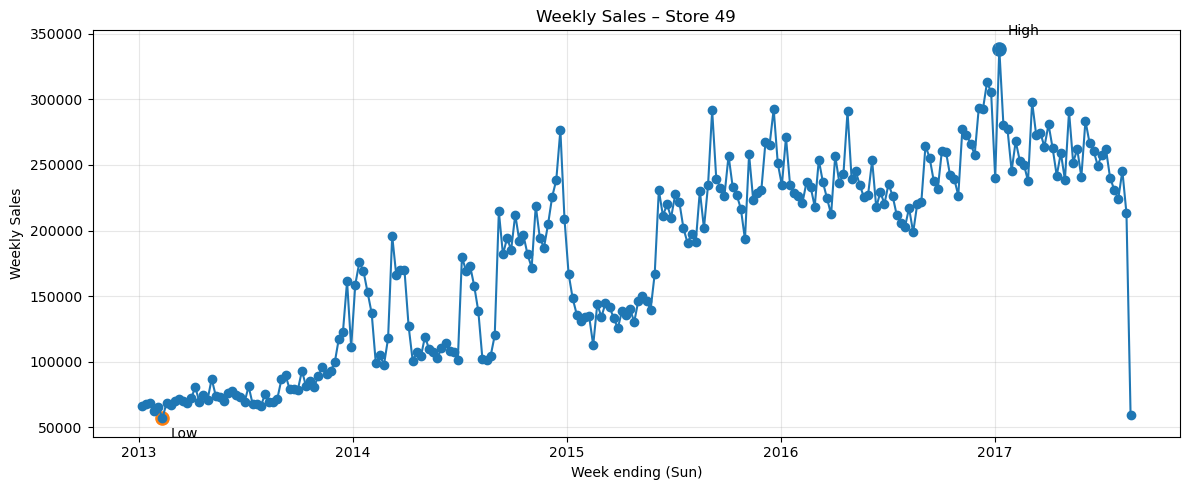

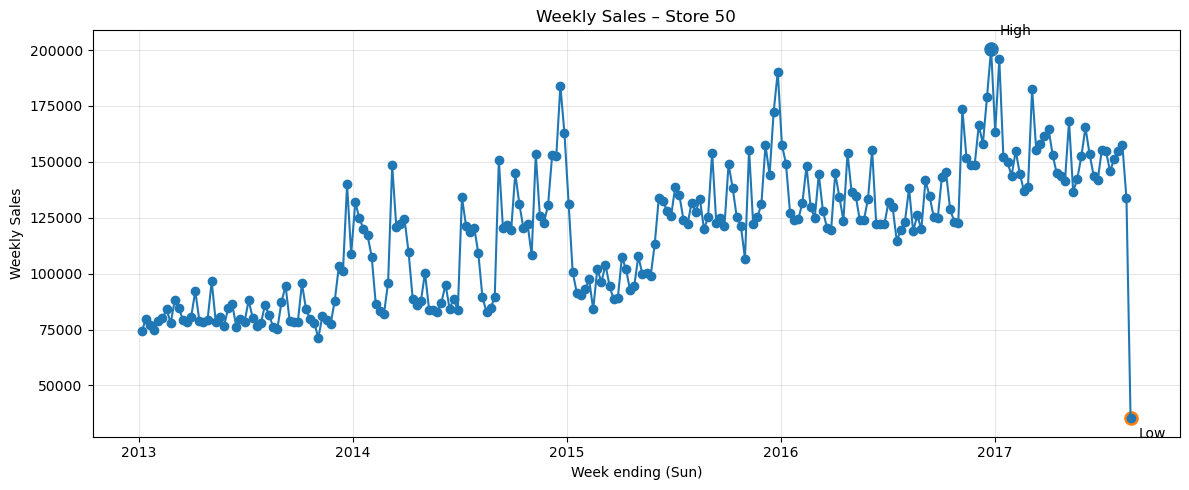

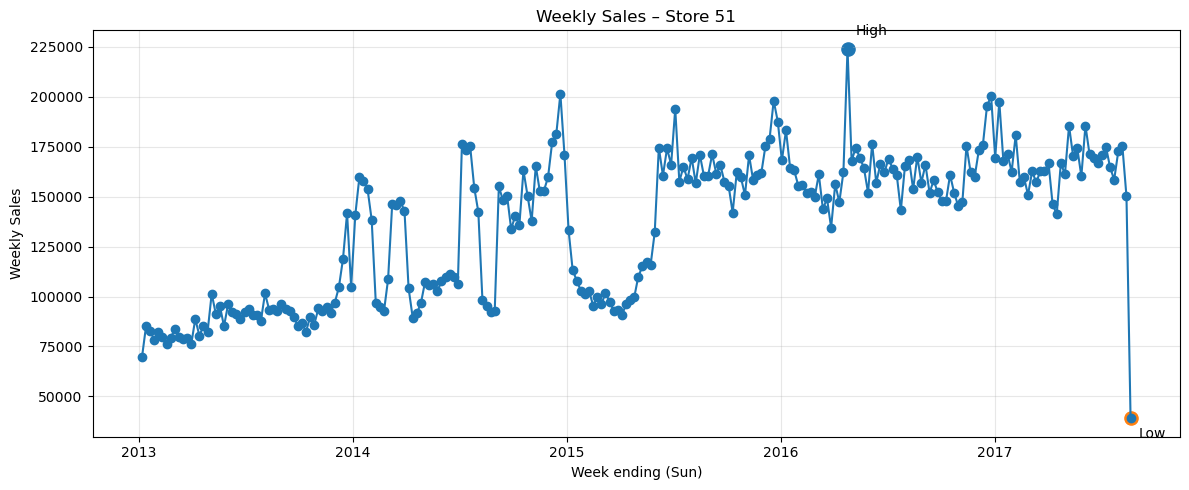

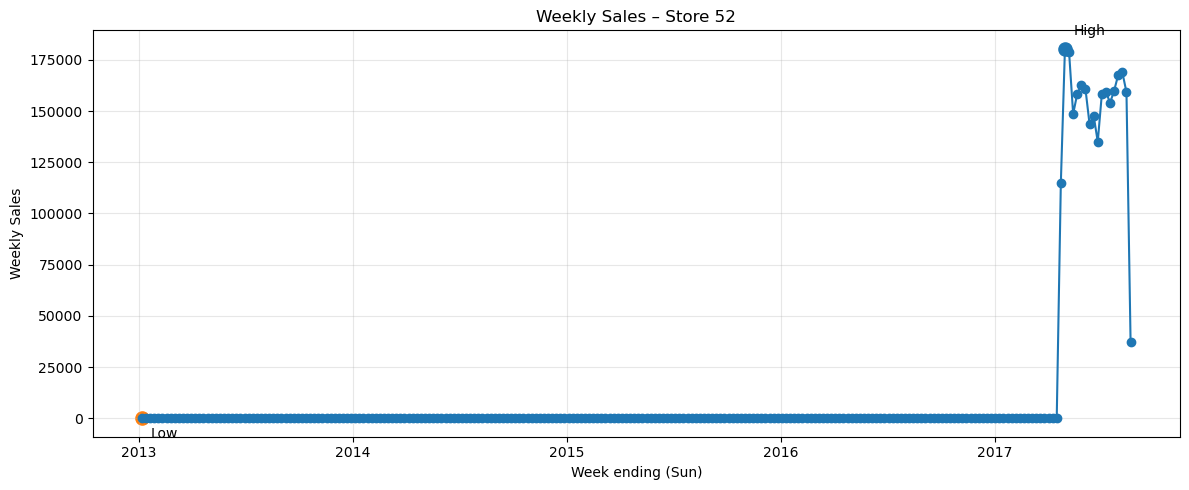

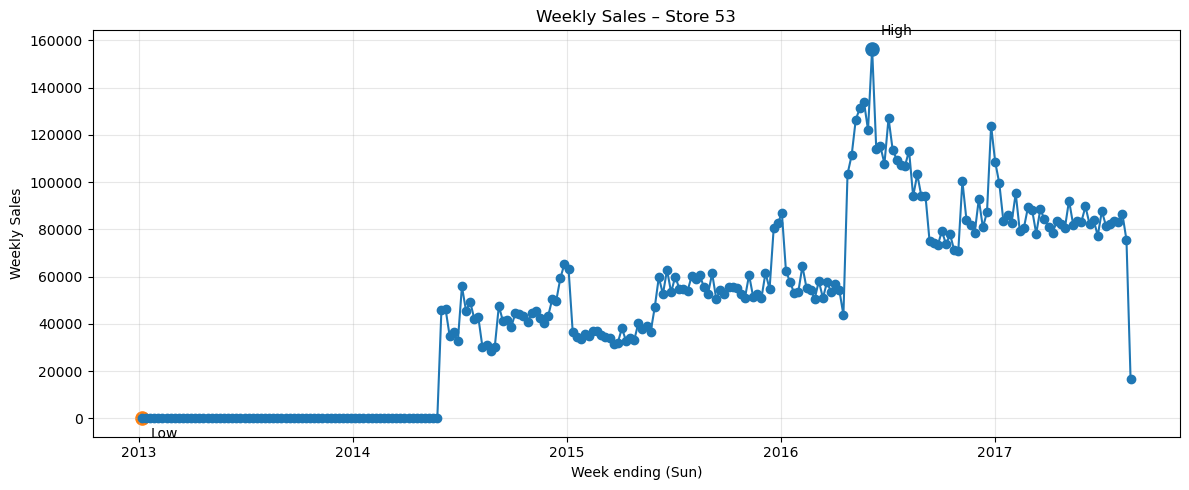

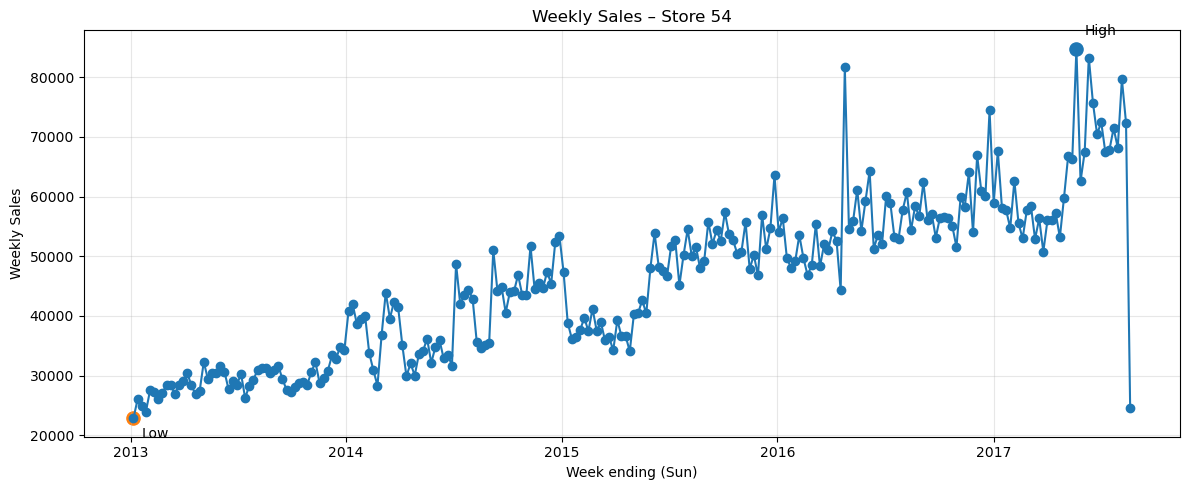

In [48]:
for store in sorted(weekly_sales['store_nbr'].unique()):
    df_s = weekly_sales[weekly_sales['store_nbr'] == store].sort_values('date')

    plt.figure(figsize=(12,5))
    plt.plot(df_s['date'], df_s['weekly_sales'], marker='o', linewidth=1.5)
    plt.title(f'Weekly Sales – Store {store}')
    plt.xlabel('Week ending (Sun)')
    plt.ylabel('Weekly Sales')
    plt.grid(True, alpha=0.3)

    # highlight high/low for this store
    hi = high_weeks[high_weeks['store_nbr'] == store].iloc[0]
    lo = low_weeks[low_weeks['store_nbr'] == store].iloc[0]
    plt.scatter([hi['high_week_end']], [hi['high_week_sales']], s=90)
    plt.scatter([lo['low_week_end']],  [lo['low_week_sales']],  s=90)
    plt.annotate('High', (hi['high_week_end'], hi['high_week_sales']), xytext=(6,10), textcoords='offset points')
    plt.annotate('Low',  (lo['low_week_end'],  lo['low_week_sales']),  xytext=(6,-14), textcoords='offset points')

    plt.tight_layout()
    plt.show()
